<h1 id="header">BookMe Company</h1>

Background

The first step is to import relevant packages in order to start solving our problem.

In [58]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h1 id="header">Data exploration and pre-processing</h1>

We now import the data regarding our customers in the _cluster.csv_ file into a Pandas dataframe. Our initial dataset is composed by 15589 observations and 21 columns, but we do have 3 duplicated rows containing the exact same information. So we decide to remove them right away, and thus our data has now 15586 rows and 21 columns.

In [59]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db.shape #initial shape of the dataset is (15589, 21)
db[db.duplicated(keep = False)] #3 duplicated entries are shown and will require cleaning. 
db.drop_duplicates(inplace = True) #we can consider dropping these duplicates due to the exact name, type of travel, year of birth and reward points. This is further illustrated in the report.
db.index = range(15586)
db #non duplicated dataset now has a new shape (15586, 21)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15582,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15583,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15584,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


By checking general information regarding our dataset, namely the datatypes and null values, we detect that there are some missing values present in the column _Year_Birth_. These missing values must be replaced later.

In [60]:
db.info() #Missing values present in Year_Birth. Input method to be discussed, potential methods would be median(), mean() or KNN-imputer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

We have both **numerical** and **categorical** variables on our dataset, so we move forward by first exploring and preparing our dataset focusing on numerical variables. Using the _describe_ method, we get to understand some general, descriptive statistics of the data stored in the different columns of our dataset. We can point:
1. Out of every variable, probably the most subjective one (albeit a numerical variable) is _RewardPoints. There is little or no information given about this variable.
2. Although the scaling system is attributed from 0 to 5, some inputs have entry values starting from 1 and others from 0. We have to discuss if this scale should be normalize, or instead create an average value, so that 0s will turn into 1s as the lowest rank of the interval. This way, we would be considering an odd-numbered scale for classification, which is common when surveying people. Also, _Wifi_ is also ranked from 0 to 6, so we must change the maximum possible value to 5.
3. We notice that the maximum year of birth in our dataset is 2014, which means that people under 18 years are present in our dataset. We must understand whose customers are these.

In [61]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


We are fixing the issues regarding the classification scale in the satisfaction variables right away, by assuming that 1 is the lowest possible value in the interval, and replacing the 6 by 5 in the case of the variable _Wifi_.

In [62]:
db['Comfort'] = db['Comfort'].replace(0,1)
db['Comfort'].value_counts()

3    3498
4    3475
2    3452
1    3061
5    2100
Name: Comfort, dtype: int64

In [63]:
db['ReceptionSchedule'] = db['ReceptionSchedule'].replace(0,1)
db['ReceptionSchedule'].value_counts()

4    3633
1    3260
5    3171
3    2797
2    2725
Name: ReceptionSchedule, dtype: int64

In [64]:
db['FoodDrink'] = db['FoodDrink'].replace(0,1)
db['FoodDrink'].value_counts()

3    3406
4    3324
2    3282
1    3221
5    2353
Name: FoodDrink, dtype: int64

In [65]:
db['Wifi'] = db['Wifi'].replace(0,1)
db['Wifi'] = db['Wifi'].replace(6,5)
db['Wifi'].value_counts()

4    3703
5    3481
3    3347
2    3245
1    1810
Name: Wifi, dtype: int64

In [66]:
db['Amenities'] = db['Amenities'].replace(0,1)
db['Amenities'].value_counts()

4    4962
5    3583
3    2931
2    2307
1    1803
Name: Amenities, dtype: int64

In [67]:
db['OnlineBooking'] = db['OnlineBooking'].replace(0,1)
db['OnlineBooking'].value_counts()

4    4696
5    4054
3    2779
2    2391
1    1666
Name: OnlineBooking, dtype: int64

In [68]:
db['RoomSpace'] = db['RoomSpace'].replace(0,1)
db['RoomSpace'].value_counts()

4    4785
5    4044
3    2701
2    2624
1    1432
Name: RoomSpace, dtype: int64

In [69]:
db['BarService'] = db['BarService'].replace(0,1)
db['BarService'].value_counts()

4    4201
3    3675
5    3591
2    2272
1    1847
Name: BarService, dtype: int64

We then proceeded to investigate the skewness of our numerical variables, related to the asymmetry of the probability distribution of each variable about its mean value. We only detected moderate degrees of skewness (between |0.5| and |1.0| for the variables _Staff_, _CheckOut_ and _Cleanliness_, all negative, thus representing left-tailed distributions. At this points, we should explore the type of curves presented here, as their skewness might suggest that these services are the "best" ones out of the assessed ones. Upon checking, their mean and median values are higher than 3, so classified as positive.

In [70]:
db.skew()

C:\Users\jfred\AppData\Local\Temp/ipykernel_10912/3378508314.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.skew()


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort              0.065083
ReceptionSchedule   -0.093768
FoodDrink            0.063672
Location            -0.050057
Wifi                -0.175043
Amenities           -0.455664
Staff               -0.554468
OnlineBooking       -0.471207
PriceQuality        -0.503290
RoomSpace           -0.460433
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.357433
dtype: float64

Another statistical measure we took a look at is kurtosis, which together with skweness might indicate the presence of outliers. There are no particular high values of kurtosos for any of the variables. Almost all kurtosis values are negative, suggesting the probability distributions for the variables associated to them have flatter peaks and thinner tails. Only the variable _RewardPoints_ has a positive kurtosis value, suggesting that it has a probability distribution with a sharper peak and heavier tails. Perhaps we should take a look at this variable later on.

In [71]:
db.kurt()

C:\Users\jfred\AppData\Local\Temp/ipykernel_10912/3217818732.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.kurt()


Year_Birth          -0.729844
RewardPoints         0.260162
Comfort             -1.160566
ReceptionSchedule   -1.336231
FoodDrink           -1.207822
Location            -1.076634
Wifi                -1.144527
Amenities           -0.914259
Staff               -0.859138
OnlineBooking       -0.934571
PriceQuality        -0.772889
RoomSpace           -0.930963
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.951996
dtype: float64

### Outliers

Which type of customers may be seen as outliers in out dataset?

#### People who give same classification in every category

We only identify 3 customers who gave the same classification in all satisfaction variables, so they should not be a problem in our analysis.

In [72]:
len(db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)])

3

Moreover, just in case, we took a look at some histograms and boxplots of the variables to which we had associated moderate skweness or kurtosis. Only the variable _RewardPoints_ seemed it could present some outliers, for which the number of reward points was below 1000 or 1500.

Since we have little or no information on this variable, we assume it can be seen as a measure of the usage of BookMe. The more the customers use it, the greater the number of reward point they have. Therefore, no action was taken towards the elimination or replacement of such observations that could be considered outliers.

Text(0.5, 1.0, 'Cleanliness')

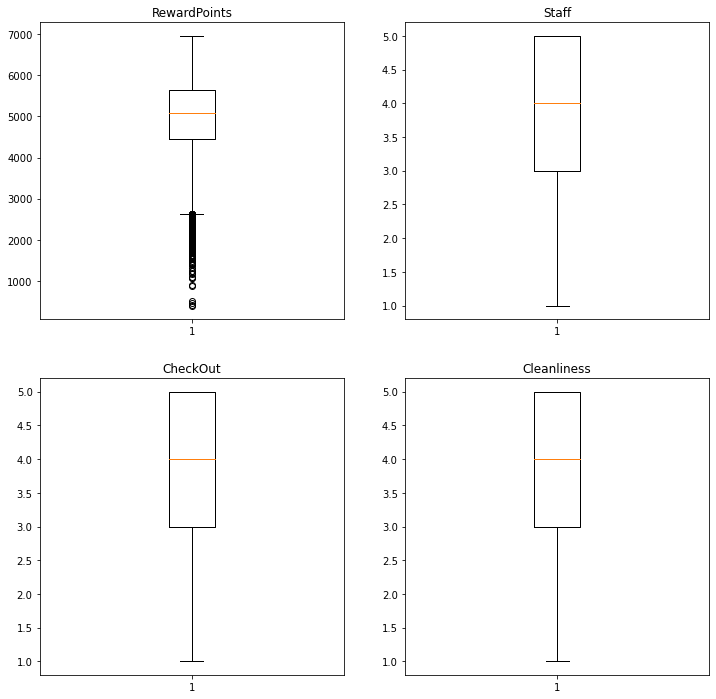

In [73]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))

axs[0, 0].boxplot(data = db, x = 'RewardPoints')
axs[0, 0].set_title('RewardPoints')
axs[0, 1].boxplot(data = db, x = 'Staff')
axs[0, 1].set_title('Staff')
axs[1, 0].boxplot(data = db, x = 'CheckOut')
axs[1, 0].set_title('CheckOut')
axs[1, 1].boxplot(data = db, x = 'Cleanliness')
axs[1, 1].set_title('Cleanliness')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

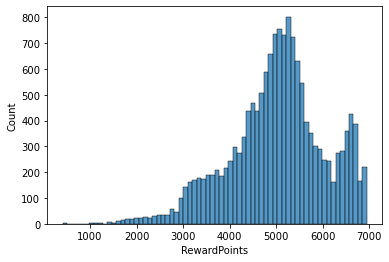

In [74]:
sns.histplot(data = db, x = 'RewardPoints')

Regarding the possible issue of having customers under the age of 18 years, we proceeded to understand how many are these. They represent 1051 customers on our database.

In fact, it might be possible to travel solo having less than 18 years. Instead, these customers can be accompanying other adults. Perhaps they should not be disregarded from our analysis.

In [75]:
db.query("Year_Birth > 2004")

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
91,churn,Ms. Bailey Johnston,yes,2007.0,leisure,double,5611,4,2,4,...,1,4,1,1,1,2,2,3,1,1
119,churn,Ms. Jennifer Smith,no,2008.0,business,double,4504,2,2,2,...,1,2,1,1,1,1,4,1,3,1
122,nochurn,Mr. Justin Keith,yes,2010.0,leisure,double,4642,4,4,4,...,1,4,1,1,4,5,5,5,4,1
131,churn,Ms. Summer Garcia,no,2011.0,business,double,5133,1,2,2,...,1,2,1,1,1,3,3,3,2,1
141,nochurn,Ms. Michelle Butler,yes,2011.0,leisure,single,5353,4,4,4,...,4,4,4,5,5,4,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15486,nochurn,Ms. Ashley Young,yes,2007.0,leisure,suite,4302,2,2,2,...,2,4,5,5,5,5,5,5,5,3
15493,churn,Mr. Brandon Rosales,yes,2008.0,leisure,double,4733,4,5,4,...,4,2,2,5,4,1,1,2,3,2
15541,churn,Ms. Robin Bailey,yes,2007.0,leisure,double,5332,3,5,3,...,4,3,2,4,3,4,5,3,5,4
15553,nochurn,Ms. Angela Brown,yes,2011.0,leisure,double,5544,5,5,5,...,5,2,5,4,4,4,4,2,4,5


We also took a general look on the spearman correlations between the numerical variables, even though we know some corrections to data might be performed later. 

In the case of unsupervised learning problems, as in the case of our problem in which we are going to perform clustering later, columns with correlations > |0.7| should be removed. We observe that _Comfort_ and _FoodDrink_ have a high positive correlation of 0.7, as well as the variable pairs _Staff_ and _BarService_, and _OnlineBooking_ and _BarService_. We also can identify some "blocks" of variables that jointly appear to be correlated. We will address these findings later.

<AxesSubplot:>

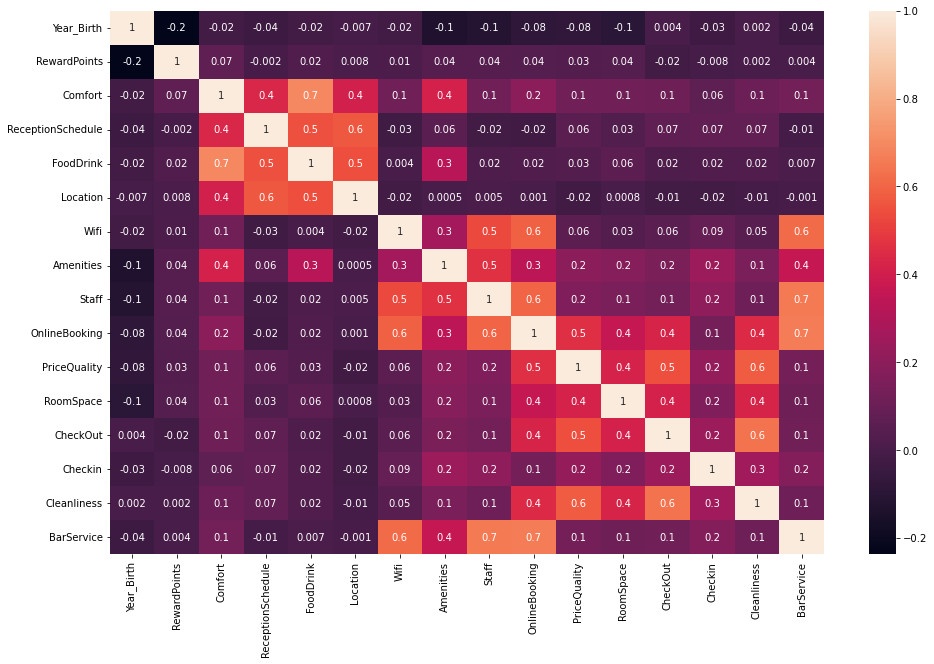

In [76]:
db_corr = db.corr(method = 'spearman')

figure = plt.figure(figsize=(16,10))
sns.heatmap(db_corr, annot=True, fmt = '.1g')

In [77]:
#db['Staff'].value_counts()
#db['CheckOut'].median()
#db['Cleanliness'].describe()

We now took a final look on the descriptive statistics of our numerical variables, in order to check if all corrections performed lead to a meaningful dataset.

In [78]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.878160,1.324472,1.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,3.046837,1.433989,1.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.891313,1.357447,1.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.243809,1.320734,1.0,2.0,3.0,4.00,5.0
Amenities,15586.0,3.398755,1.299903,1.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454318,1.310112,1.0,2.0,4.0,5.00,5.0


We now move forward to explore our categorical variables. Using the methods _describe_ and _value_counts_ we can dive deeper on the exploration of these variables.

Some interesting findings are summarized below:
1. The number of "churn" and "no churn" customers is relatively similar.
2. Most of our customers are "old" customers that use our services for more than a year. We are not seeming to catch new customers.
3. Most of the customers on our dataset travel by business.
4. Few customers book suite rooms.

In [79]:
db.describe(include="O").T

,count,unique,top,freq
Churn,15586,2,nochurn,8475
Name,15586,14227,Mr. Michael Smith,9
Longevity,15586,3,yes,12545
TypeTravel,15586,2,business,10754
RoomType,15586,3,single,7442


In [80]:
db['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

We address a misclassification issue associated to the variable _Longevity_. All "y" will be replaced by "yes" to promote consistency later.

In [81]:
db['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

In [82]:
db['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

In [83]:
db['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

Type Travel vs Room Type Graph

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

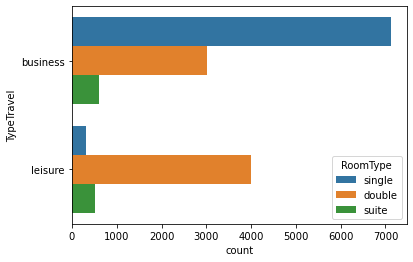

In [84]:
sns.countplot(y = 'TypeTravel', hue = 'RoomType', data = db,
             order = ['business','leisure'])

Type Travel vs Longevity Graph

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

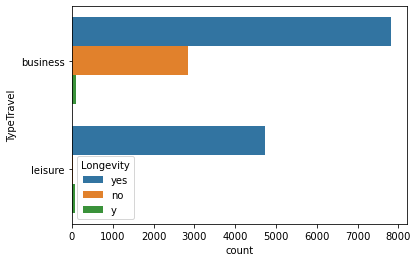

In [85]:
sns.countplot(y = 'TypeTravel', hue = 'Longevity', data = db,
             order = ['business','leisure'])

Before moving forward to some more data cleaning, we wanted to verify if there are recurrent visits from the same customers on our dataset. We checked that there are repeated visits from customers with the same name and year of birth in our dataset.

At this point, our analysis leads us to assume that these might be the same customers. The number of reward points changes according to each visit.

In [86]:
#Recurrent Visits - exploration
#This is aimed at getting more insight about recurrent visits and how they would affect RewardPoints

recur1 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth'])['Name'].count())
recur1.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur1.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur1

#39 clients have the same name and year of birth, meaning that they might be recurrent visits.

recur2 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity'])['Name'].count())
recur2.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur2.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur2

#26 of those clients have the same Longevity status, meaning that enough time has passed on 13 clients to change the Longevity status from 0 to 1.

recur3 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType'])['Name'].count())
recur3.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur3.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur3

#13 of those clients have kept the same RoomType and Longevity. They can potentially be the same people.

recur4 =  pd.DataFrame(db.groupby(['Name', 'Year_Birth', 'Longevity', 'RoomType', 'RewardPoints'])['Name'].count())
recur4.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur4.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
recur4

#No client has the same amount of RewardPoints, meaning that they change according to the number of visits.
#On average, RewardPoints varies 697 points [from 30 to 1892] or 165 [from -645 to 1892]

#db.loc[db.Name == "Ms. Danielle Taylor"]
#For Anthony Smith (1982) - 4508/5275/5554, Business Single and Suite
#For Brian Smith (1979) - 4478/4567, Business Single
#For Christopher Murphy (1979) - 6367/6152, Business Single
#For Jason Bell (1996) - 4539/3404, Business Single
#For John Russel (1977) - 3645/4013, Business Single
#For John Schwartz (1980) - 5607/5577, Business Double
#For Joseph Thomas (1970) - 5051/6570, Business Single
#For Michael Miller (1992) - 3907/4442, Business Single
#For Timothy Lee (1980) - 5113/3221, Business Single - Churn
#For Amanda Smith (1962) - 6190/3906, Business Double - Churn and Business Single
#For Amanda Smith (1969) - 6577/6655, Business Single
#For Cynthia Martin (1991) 4939/4456, Business Single - Churn
#For Dana Anderson (1972) 5807/6452, Business Double
#For Danielle Taylor (1981) 5147/4990, Business Double

,,,,,Recurrent
Name,Year_Birth,Longevity,RoomType,RewardPoints,


We now proceed to some data cleaning.

Replace the "y" by "yes" in the variable _Longevity_ and converting it to a numerical dummy variable, since that is required for the clustering stage.

In [87]:
db['Longevity'] = db['Longevity'].replace('y','yes') #Yes and y both show as different values, will be changed into "yes"
db['Longevity'] = db['Longevity'].replace('yes',1).replace('no',0)
db['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

For the variable _Churn_, we are creating a dummy variable in which 1 is "churn" and 0 is "no churn".

In [88]:
db['Churn'] = db['Churn'].replace('churn',1).replace('nochurn',0)
db['Churn'].value_counts()

0    8475
1    7111
Name: Churn, dtype: int64

For the variable _TypeTravel_, we are creating a dummy variable in which 1 is "business" and 0 is "leisure".

In [89]:
db['TypeTravel'] = db['TypeTravel'].replace('business',1).replace('leisure',0) #1 will represent business and 0 will represent leisure
db['TypeTravel'].value_counts()

1    10754
0     4832
Name: TypeTravel, dtype: int64

Based on the prefix "Mr." or "Ms." in the variable _Name_, we create a variable _Gender_, in which 1 is male and 0 is female.

In [90]:
gender = db['Name'].str.split(' ',expand = True,n=1)[0]
db['Gender'] = gender
db['Gender'] = db['Gender'].replace('Ms.',0).replace('Mr.',1)
db['Gender'].value_counts()

0    7982
1    7604
Name: Gender, dtype: int64

For now, we no longer need the variable _Name_ so we drop it from the dataset.

In [91]:
db.drop(columns = ['Name'], axis = 1, inplace = True)

We also create dummy variables associated to _RoomType_ since this is a categorical variable that can take three different possible values.

In [92]:
db = pd.get_dummies(db)
db

,Churn,Longevity,Year_Birth,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,RoomType_double,RoomType_single,RoomType_suite
0,1,1,1974.0,1,4907,3,4,1,4,4,...,3,3,3,4,3,4,0,0,1,0
1,0,1,1965.0,1,6724,1,1,1,1,5,...,5,5,5,1,5,2,1,0,1,0
2,1,1,1973.0,1,4365,3,3,3,3,1,...,3,2,3,2,3,1,1,0,1,0
3,0,1,1993.0,0,3849,1,1,1,1,4,...,4,4,4,4,4,3,0,1,0,0
4,0,1,1989.0,1,5376,2,2,3,2,5,...,5,3,4,1,3,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,4968,2,1,2,2,3,...,4,5,1,3,4,3,0,1,0,0
15582,1,0,2000.0,1,4970,3,3,3,3,5,...,3,1,3,4,4,5,0,1,0,0
15583,0,1,1964.0,1,4046,1,1,1,1,3,...,4,4,4,5,4,4,1,0,1,0
15584,0,1,1992.0,0,5155,4,3,4,4,5,...,2,5,4,3,4,5,1,1,0,0


Now that we are finishing the stage of exploration and pre-processing, we create an overall satisfaction variable, called _AverageRating_ that corresponds to the average value of all satisfaction variables.

We try to understand if it correlated in any way with the variable _RewardPoints_, by plotting some scatterplots. However, no significant conclusion was reached.

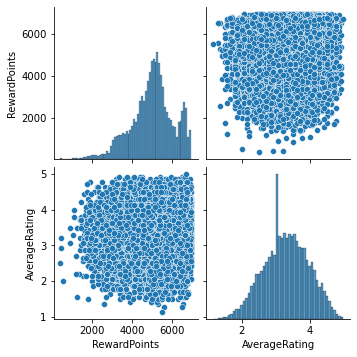

In [93]:
rating = ((db['Comfort'] + db['ReceptionSchedule'] + db['FoodDrink'] + db['Location'] + db['Wifi'] + db['Amenities'] + db['Staff'] + db['OnlineBooking'] + db['PriceQuality'] + db['RoomSpace'] + db['CheckOut'] + db['Checkin'] + db['Cleanliness'] + db['BarService'])/14)
db['AverageRating'] = rating.round(2)
db

rec = db.loc[db.Churn == 0, 'AverageRating']
rec.value_counts()

#Exploring RewardPoints with (transformed) categorical variables
db_subset1 = db[['RewardPoints', 'AverageRating']].copy()
sns.pairplot(db_subset1)

Given our findings by looking at the correlation matrix above, we decided to create three buckets of variables according to the correlations between the 14 satisfaction variables.
1. _Rating1_ includes variables _Comfort_, _ReceptionSchedule_, _FoodDrink_ and _Location_.
2. _Rating2_ includes variables _Amenities_, _Wifi_, _OnlineBooking_, _Staff_ and _BarService_.
3. _Rating3_ includes variables _PriceQuality_, _RoomSpace_, _CheckOut_, _Checkin_ and _Cleanliness_.

##### However, a further in depth analysis should be made to assess the buckets created

In [94]:
db['Rating1'] = round((db['Comfort'] + db['ReceptionSchedule'] + db['FoodDrink'] + db['Location'])/4,2)
db['Rating2'] = round((db['Amenities'] + db['Wifi'] + db['OnlineBooking'] + db['Staff']+ db['BarService'])/5,2)
db['Rating3'] = round((db['PriceQuality'] + db['RoomSpace'] + db['CheckOut']+ db['Checkin']+ db['Cleanliness'])/5,2)

Since the variable _RewardPoints_ can take up to many different values (almost exhibiting a continuous behaviour), we decided to create bins. According to the number of reward points, the customers will then be classified into four categories: "Bronze", "Silver", "Gold" and "Platinum".

Moreover, since to each bin it is associated an order, we apply an ordinal encoding transformation.

In [95]:
db['RewardPoints_Bins'] = pd.cut(db['RewardPoints'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
db['RewardPoints_Bins'] = db['RewardPoints_Bins'].replace('Bronze',0).replace('Silver',1).replace('Gold',2).replace('Platinum',3)

db.drop(columns = ['RewardPoints'], axis=1, inplace=True)
db

,Churn,Longevity,Year_Birth,TypeTravel,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,BarService,Gender,RoomType_double,RoomType_single,RoomType_suite,AverageRating,Rating1,Rating2,Rating3,RewardPoints_Bins
0,1,1,1974.0,1,3,4,1,4,4,3,...,4,0,0,1,0,3.29,3.00,3.6,3.2,2
1,0,1,1965.0,1,1,1,1,1,5,3,...,2,1,0,1,0,3.14,1.00,3.8,4.2,3
2,1,1,1973.0,1,3,3,3,3,1,4,...,1,1,0,1,0,2.71,3.00,2.6,2.6,2
3,0,1,1993.0,0,1,1,1,1,4,4,...,3,0,1,0,0,3.14,1.00,4.0,4.0,2
4,0,1,1989.0,1,2,2,3,2,5,5,...,5,1,0,1,0,3.57,2.25,5.0,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1988.0,1,2,1,2,2,3,2,...,3,0,1,0,0,2.79,1.75,3.0,3.4,2
15582,1,0,2000.0,1,3,3,3,3,5,3,...,5,0,1,0,0,3.57,3.00,4.6,3.0,2
15583,0,1,1964.0,1,1,1,1,1,3,4,...,4,1,0,1,0,3.21,1.00,4.0,4.2,2
15584,0,1,1992.0,0,4,3,4,4,5,4,...,5,1,1,0,0,4.07,3.75,4.8,3.6,2


We notice the missing values in the _Year_Birth_ column are of type MAR (Missing At Random). In fact, 81.5% of the customers with this column missing are women.

The missing values were replaced using the KNN Imputer algorithm, thus accounting the k-nearest observations to the one with the missing value. We decided to use the default values of this imputer provided by _sklearn_, then considering 5 neighbors, euclidean distance, and uniform weights for all neighbors.

In [96]:
from sklearn.impute import KNNImputer
k_imputer = round(np.sqrt(len(db)),0).astype('int32') # 125
imputer = KNNImputer(n_neighbors=k_imputer, weights="uniform", metric='nan_euclidean')
imputer.fit(db)
db_KNN = imputer.transform(db)
db_KNN = pd.DataFrame(db_KNN)
db_KNN[2] = db_KNN[2].round(0)
db_KNN[2].count

db['Year_Birth'] = db_KNN[2]
db['Year_Birth'].isna().value_counts()

False    15586
Name: Year_Birth, dtype: int64

Now that there are no missing values in the column _Year_Birth_, we computed the customers' age based on it. After the calculation, the variable _Year_Birth_ is dropped from the dataset.

In [97]:
from datetime import date

db['Age'] = date.today().year - db['Year_Birth']
db.drop(columns = ['Year_Birth'], axis=1, inplace=True)
db

,Churn,Longevity,TypeTravel,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,Gender,RoomType_double,RoomType_single,RoomType_suite,AverageRating,Rating1,Rating2,Rating3,RewardPoints_Bins,Age
0,1,1,1,3,4,1,4,4,3,4,...,0,0,1,0,3.29,3.00,3.6,3.2,2,48.0
1,0,1,1,1,1,1,1,5,3,4,...,1,0,1,0,3.14,1.00,3.8,4.2,3,57.0
2,1,1,1,3,3,3,3,1,4,4,...,1,0,1,0,2.71,3.00,2.6,2.6,2,49.0
3,0,1,0,1,1,1,1,4,4,5,...,0,1,0,0,3.14,1.00,4.0,4.0,2,29.0
4,0,1,1,2,2,3,2,5,5,5,...,1,0,1,0,3.57,2.25,5.0,3.2,3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1,2,1,2,2,3,2,4,...,0,1,0,0,2.79,1.75,3.0,3.4,2,34.0
15582,1,0,1,3,3,3,3,5,3,5,...,0,1,0,0,3.57,3.00,4.6,3.0,2,22.0
15583,0,1,1,1,1,1,1,3,4,5,...,1,0,1,0,3.21,1.00,4.0,4.2,2,58.0
15584,0,1,0,4,3,4,4,5,4,5,...,1,1,0,0,4.07,3.75,4.8,3.6,2,30.0


From this point one, we subdivided our original dataset into two separate ones to facilitate some latter analyses to our dataset before moving on to clustering.

In [98]:
db_copy = db.drop(columns = ['FoodDrink', 'ReceptionSchedule','Comfort', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'], axis=1)
db_copy

,Churn,Longevity,TypeTravel,Gender,RoomType_double,RoomType_single,RoomType_suite,AverageRating,Rating1,Rating2,Rating3,RewardPoints_Bins,Age
0,1,1,1,0,0,1,0,3.29,3.00,3.6,3.2,2,48.0
1,0,1,1,1,0,1,0,3.14,1.00,3.8,4.2,3,57.0
2,1,1,1,1,0,1,0,2.71,3.00,2.6,2.6,2,49.0
3,0,1,0,0,1,0,0,3.14,1.00,4.0,4.0,2,29.0
4,0,1,1,1,0,1,0,3.57,2.25,5.0,3.2,3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1,0,1,0,1,0,0,2.79,1.75,3.0,3.4,2,34.0
15582,1,0,1,0,1,0,0,3.57,3.00,4.6,3.0,2,22.0
15583,0,1,1,1,0,1,0,3.21,1.00,4.0,4.2,2,58.0
15584,0,1,0,1,1,0,0,4.07,3.75,4.8,3.6,2,30.0


In [99]:
db_copy.describe()
db_copy['Longevity'].value_counts()

1    12712
0     2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='RewardPoints_Bins', ylabel='Count'>

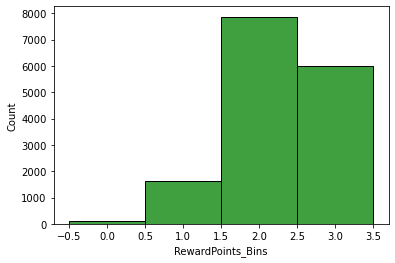

In [100]:
sns.histplot(db_copy['RewardPoints_Bins'], color="g", bins = 4)

<AxesSubplot:>

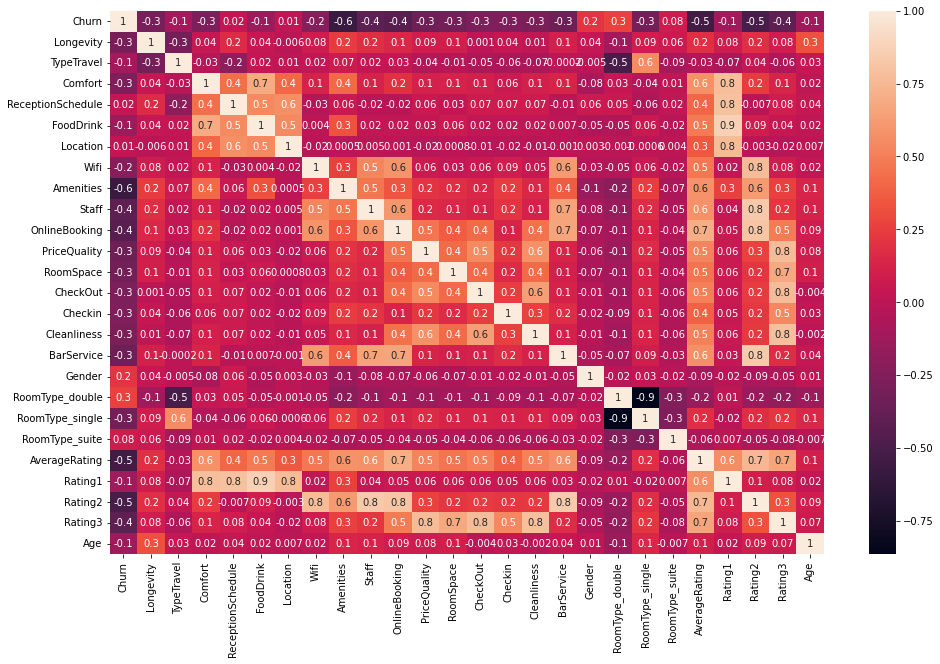

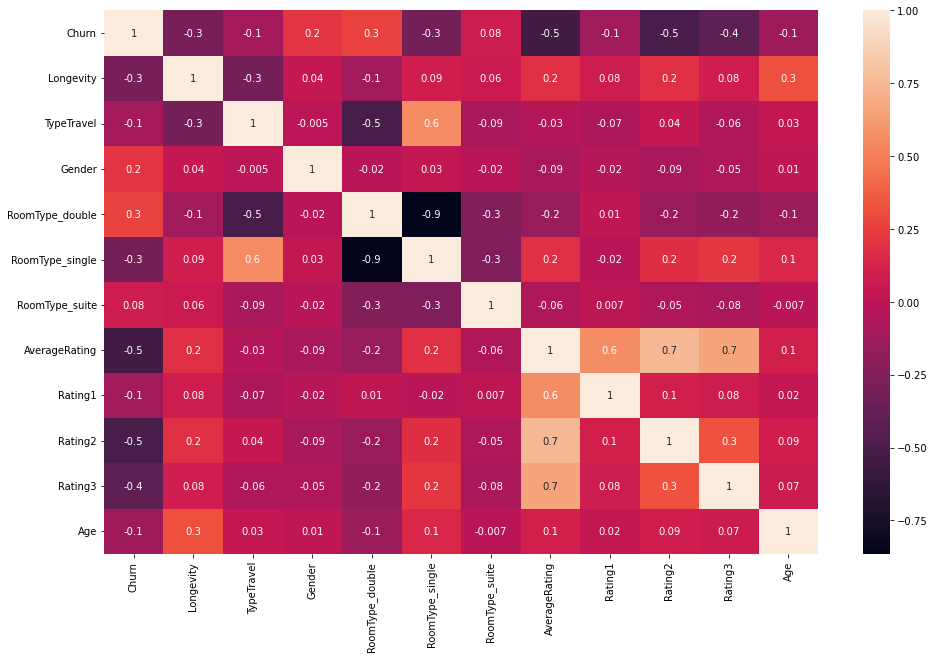

In [101]:
db_vis = db.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_vis, annot=True, fmt = '.1g')

db_visredux = db_copy.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_visredux, annot=True, fmt = '.1g') 

# Clustering

After the stages of data exploration and data cleaning, we move forward to the clustering stage. In order to perform clustering in a comprehensive way, we defined several perspectives for analysis, that will help us understand which type of customers we have on our dataset, based on their characteristics, satisfaction, but also accounting the quality of service we are providing them.

## Customer Characteristics

We start by selecting the variables for the "Customer Characteristics" perspective. We are selecting the variables that help us characterize them - _Gender_, _Age_, _TypeTravel_, the dummy variables regarding _RoomType_, _Longevity_ and _RewardPoints_Bins_. Again, we are interpreting the reward points as a measurement of service usage.

In [102]:
db_customer_characteristics = db_copy[['Gender','Age', 'TypeTravel', 'RoomType_double', 'RoomType_single', 'RoomType_suite', 'Longevity', 'RewardPoints_Bins']]
db_customer_characteristics

,Gender,Age,TypeTravel,RoomType_double,RoomType_single,RoomType_suite,Longevity,RewardPoints_Bins
0,0,48.0,1,0,1,0,1,2
1,1,57.0,1,0,1,0,1,3
2,1,49.0,1,0,1,0,1,2
3,0,29.0,0,1,0,0,1,2
4,1,33.0,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...
15581,0,34.0,1,1,0,0,0,2
15582,0,22.0,1,1,0,0,0,2
15583,1,58.0,1,0,1,0,1,2
15584,1,30.0,0,1,0,0,1,2


Since the variables considered in this perspective vary between ranges differently (_Age_), it is a safe choice to start by normalizing the data using the MinMaxScaler, that normalizes each variable individually between 0 and 1.

In [103]:
db_customer_characteristics_ready = MinMaxScaler().fit_transform(db_customer_characteristics)
db_customer_characteristics_ready

array([[0.        , 0.51282051, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.62820513, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.52564103, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       ...,
       [1.        , 0.64102564, 1.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.28205128, 0.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 0.3974359 , 1.        , ..., 1.        , 1.        ,
        0.66666667]])

In [104]:
cols = db_customer_characteristics.columns
db_customer_characteristics_ready = pd.DataFrame(db_customer_characteristics_ready, columns = cols)
db_customer_characteristics_ready

,Gender,Age,TypeTravel,RoomType_double,RoomType_single,RoomType_suite,Longevity,RewardPoints_Bins
0,0.0,0.512821,1.0,0.0,1.0,0.0,1.0,0.666667
1,1.0,0.628205,1.0,0.0,1.0,0.0,1.0,1.000000
2,1.0,0.525641,1.0,0.0,1.0,0.0,1.0,0.666667
3,0.0,0.269231,0.0,1.0,0.0,0.0,1.0,0.666667
4,1.0,0.320513,1.0,0.0,1.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
15581,0.0,0.333333,1.0,1.0,0.0,0.0,0.0,0.666667
15582,0.0,0.179487,1.0,1.0,0.0,0.0,0.0,0.666667
15583,1.0,0.641026,1.0,0.0,1.0,0.0,1.0,0.666667
15584,1.0,0.282051,0.0,1.0,0.0,0.0,1.0,0.666667


We perform a PCA in order to understand if it is worth it to perform any data reduction step before clustering, or to gather novel insights on correlations in our dataset.

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle' , svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(db_customer_characteristics_ready)

PCA(n_components='mle', svd_solver='full')

In [106]:
# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.
# print(pca.components_) # dimensão: n_components x n_components

# The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of
# freedom.
# print(pca.explained_variance_) # dimensão: n_components

# Percentage of variance explained by each of the selected components.
print((pca.explained_variance_ratio_)*100) # dimensão: n_components

[43.8121119  19.89116344 16.16266152  7.87042563  6.0133248   4.04894364
  2.20136907]


In [107]:
cc_components = pd.DataFrame(pca.components_[0:6], columns = db_customer_characteristics_ready.columns).T
pd.set_option('precision', 2)
cc_components.style.apply(lambda x: ["background: #0971DA" if abs(v) > 0.75 else "background: #6dedeb" if abs(v) > 0.5 else "" for v in x], axis = 1)

,0,1,2,3,4,5
Gender,-0.02,-0.98,0.17,0.03,-0.00,-0.04
Age,-0.03,-0.02,-0.12,-0.05,-0.24,-0.39
TypeTravel,-0.45,0.11,0.54,-0.03,-0.69,0.08
RoomType_double,0.62,0.02,0.25,-0.43,-0.19,0.03
RoomType_single,-0.64,-0.02,-0.15,-0.37,0.31,-0.08
RoomType_suite,0.01,0.00,-0.10,0.80,-0.12,0.05
Longevity,-0.00,-0.14,-0.75,-0.18,-0.56,0.16
RewardPoints_Bins,0.06,0.04,-0.02,0.05,-0.10,-0.90


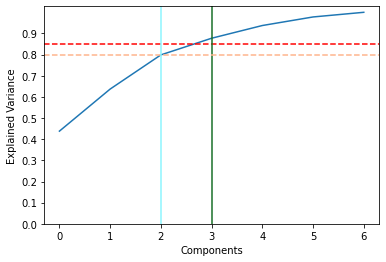

In [108]:
commulative = np.cumsum(pca.explained_variance_ratio_)
nComponents = np.argmax(commulative>0.85)

plt.plot(commulative)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xticks(np.arange(0, len(pca.explained_variance_), step=1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.axhline(y = 0.85, color = 'r', linestyle = 'dashed')  
plt.axvline(x = nComponents, color = '#176e27')
plt.axhline(y = commulative[2], color = '#feb48c', linestyle = 'dashed')  
plt.axvline(x = 2, color = '#8cf5fe')
plt.show()

We can see that some of the components that explain more variance within the original dataset are moderately or highly correlated with some variables: namely related to the type of rooms, travel type, gender and longevity. We suppose at least some of these variables will be relevant when applying the clustering algorithms. In contrast, variable _Age_ is not significantly correlated to any of the principal components, thus the clusters must not be defined according to it.

Despite the insightful findings provided by PCA, we decided not to move forward with it and transform our dataset accordingly. This decision is mainly related to the fact that the dataset original dimensions are relatively reduced.
1. A relatively small number of columns should not impact the clustering results.
2. It is not worth loosing 15% to 10% percent of the variability in the original dataset, since the number of observations (between 15000 and 16000) is relatively small. Aplying PCA in this case will not lead to a significant increase in computational performance.

We are now applying KMeans to the "Customer Characteristics" perspective. In the first place, we try to ascertain how many clusters are suitable to our analysis, based on the results provided by the elbow method and the aglomerative hierarchical clustering algorithm.
1. According to the elbow method, k = 2 is suitable (maximum decrease in curvature or bend).
2. Agglomerative hierarchical clustering suggests k = 3 clusters (longer vertical lines when agglomerating clusters; otherwise, 15-20 clusters is suggested but this does not suit our problem).

## KMeans

In [109]:
from sklearn.cluster import KMeans

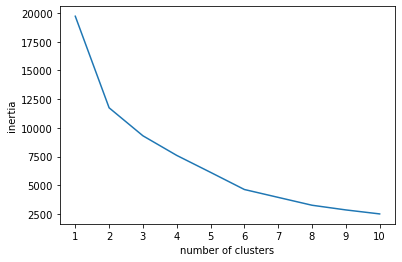

In [110]:
# Elbow Method

ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(db_customer_characteristics_ready)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

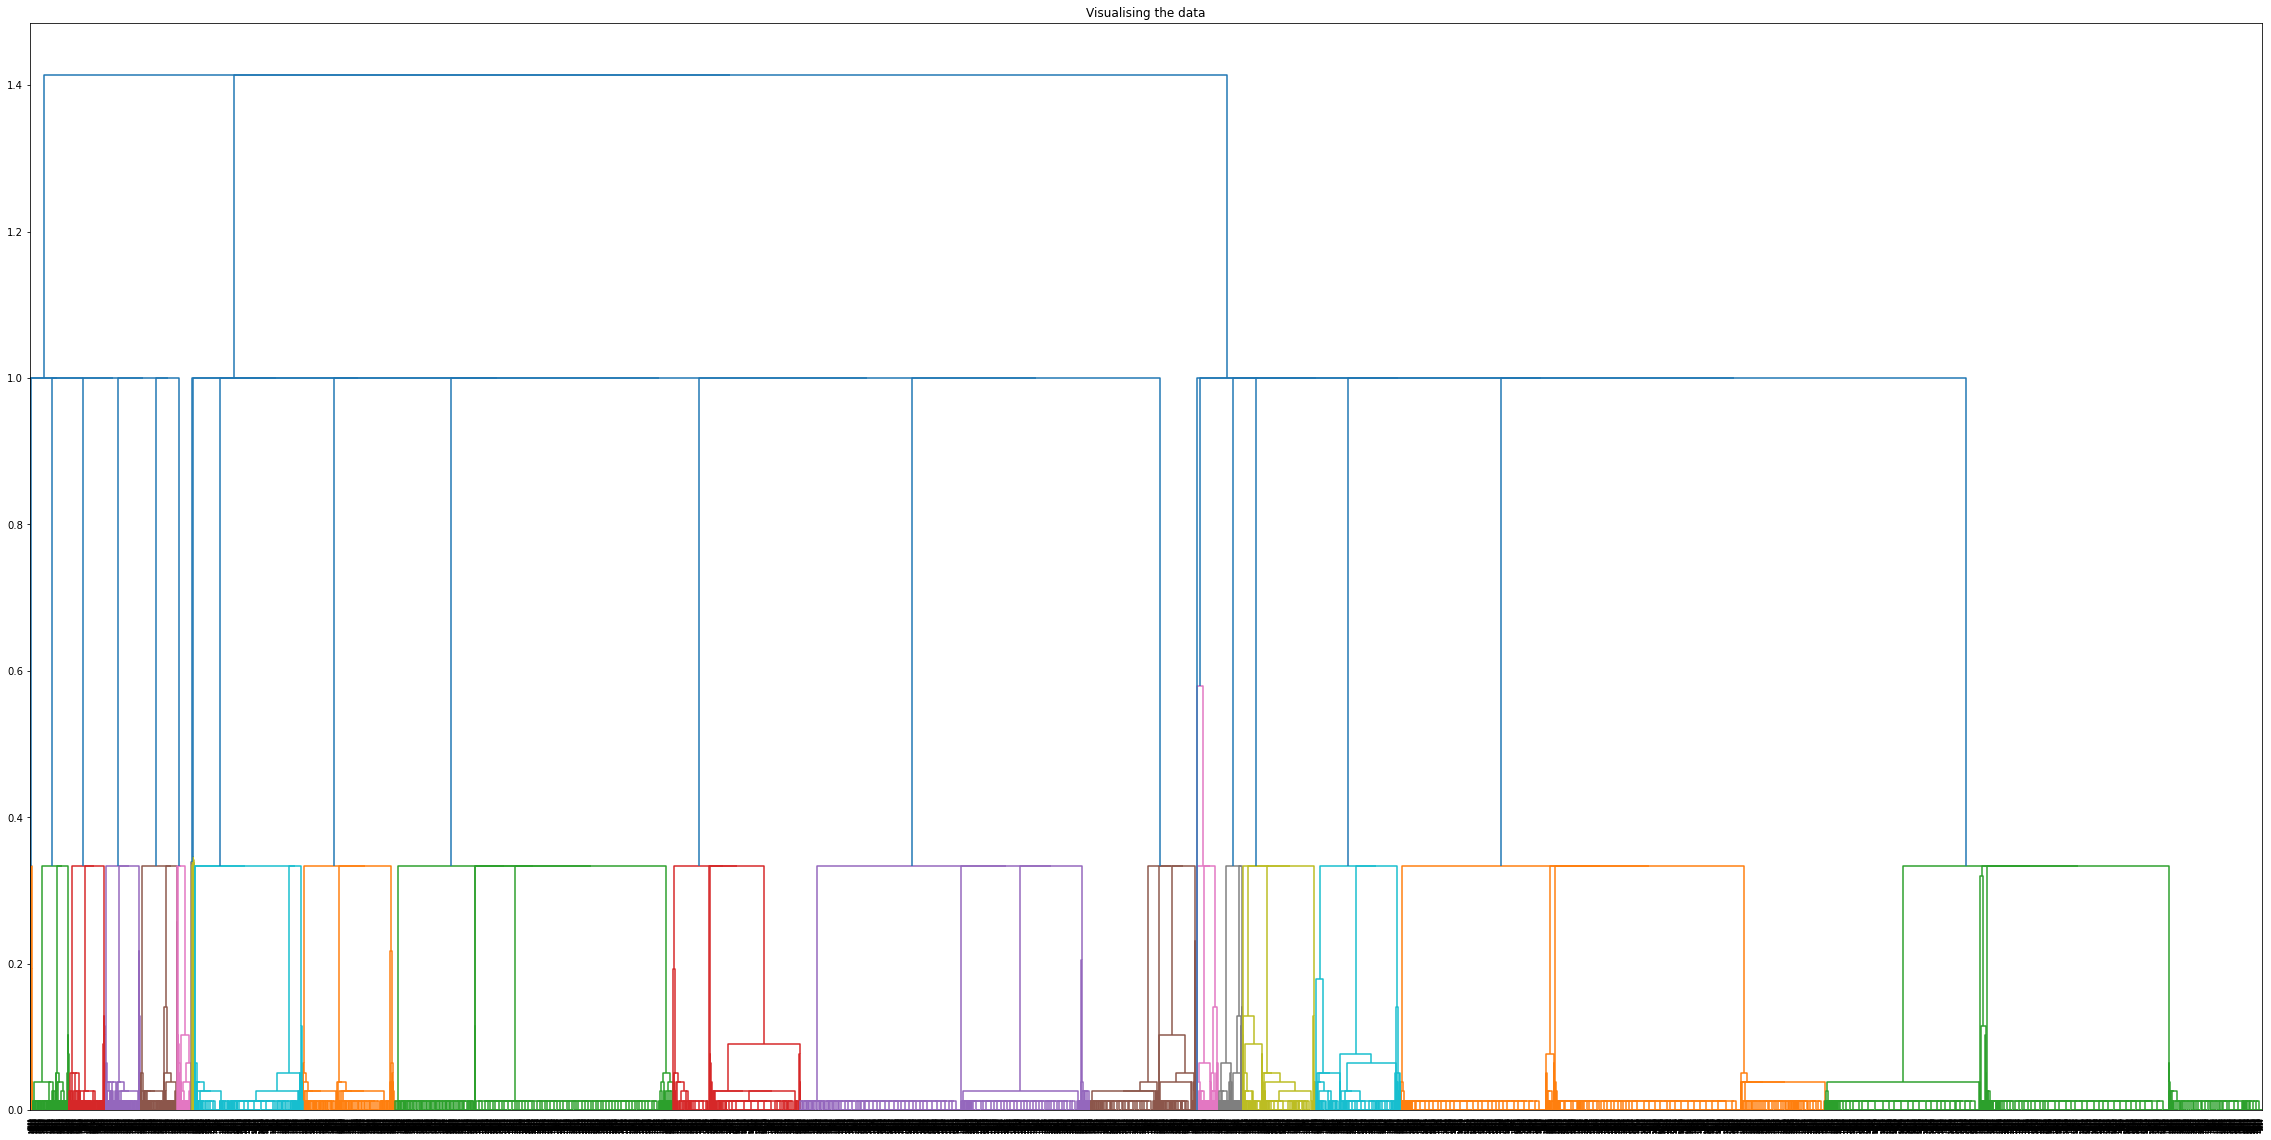

In [111]:
import scipy.cluster.hierarchy as shc

db_customer_characteristics_ready_hc = shc.linkage(db_customer_characteristics_ready) # aplica o algoritmo de hierachical clustering, por defeito a distância utilizada nos
                                                # cálculos é a distância euclideana
plt.figure(figsize =(40, 20))
plt.title('Visualising the data')
dendrogram_data = shc.dendrogram(db_customer_characteristics_ready_hc)

##### 2 Clusters

We then apply KMeans for k = 2 and k = 3. By looking at the profile of each cluster more carefully, we should be able to decide which is the best number of clusters more clearly.

The results provided by the algorithm with or without the _kmeans++_ initialization for both studied ks were very similar. Again, the number of observations in the dataset is relatively small, then defining the seeds randomly or not should not lead to very distinctive results. The algorithm converges the same way.

In [112]:
# By looking at the profile of each cluster more carefully, we will decide which is the best number of clusters more clearly.

# Apply K-means with k=2

db_customer_characteristics_ready_k2 = db_customer_characteristics_ready.copy()
model_cc_k2 = KMeans(n_clusters=2).fit(db_customer_characteristics_ready_k2)

db_customer_characteristics_ready_k2['label'] = model_cc_k2.labels_

db_customer_characteristics_ready_k2.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_k2.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_k2.groupby(['label']).std().transpose()
#db_customer_characteristics_ready_k2.groupby(['label']).count().transpose()

label,0,1
Gender,0.50,0.48
Age,0.44,0.39
TypeTravel,0.96,0.40
RoomType_double,0.00,0.93
RoomType_single,0.92,0.00
RoomType_suite,0.08,0.07
Longevity,0.85,0.78
RewardPoints_Bins,0.72,0.79


In [113]:
db_customer_characteristics_k2 = db_customer_characteristics.copy()
db_customer_characteristics_k2['label'] = model_cc_k2.labels_

db_customer_characteristics_k2.groupby(['label']).mean().transpose()
#db_customer_characteristics_k3.groupby(['label']).median().transpose()
#db_customer_characteristics_k3.groupby(['label']).stdev().transpose()
#db_customer_characteristics_k3.groupby(['label']).count().transpose()

label,0,1
Gender,0.50,0.48
Age,42.30,38.17
TypeTravel,0.96,0.40
RoomType_double,0.00,0.93
RoomType_single,0.92,0.00
RoomType_suite,0.08,0.07
Longevity,0.85,0.78


In [114]:
# Check distances between clusters

from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model_cc_k2.cluster_centers_)
dists

array([[0.        , 1.43092385],
       [1.43092385, 0.        ]])

In [115]:
db_customer_characteristics_k2["label"].value_counts()

0    8056
1    7530
Name: label, dtype: int64

In [116]:
cluster0 = db_customer_characteristics_k2[db_customer_characteristics_k2.label==0]
cluster1 = db_customer_characteristics_k2[db_customer_characteristics_k2.label==1]

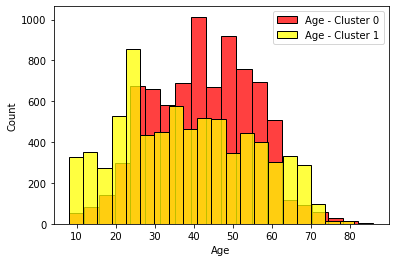

In [117]:
sns.histplot(cluster0['Age'],color='red',label='Age - Cluster 0', bins = 20)
sns.histplot(cluster1['Age'],color='yellow',label='Age - Cluster 1', bins = 20)
plt.legend()

For k = 2, we can cleary distinguish two clusters according to the type of travel and room type.
1. In one of the clusters, we have customers who travel mainly because of business reasons and book single rooms.
2. In the other cluster, most customers travel by leisure and book double rooms.

The mean and median values for the remaining variables does not vary significantly between the two clusters.
Moreover, the customers are segmented evenly between the two clusters.

##### 3 Clusters

In [118]:
# Apply K-means with k=3

db_customer_characteristics_ready_k3 = db_customer_characteristics_ready.copy()
#model_cc_k3 = KMeans(n_clusters=3).fit(db_customer_characteristics_ready_k3)
model_cc_k3 = KMeans(n_clusters=3, init = 'k-means++').fit(db_customer_characteristics_ready_k3)

db_customer_characteristics_ready_k3['label'] = model_cc_k3.labels_

db_customer_characteristics_ready_k3.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_k3.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_k3.groupby(['label']).stdev().transpose()

label,0,1,2
Gender,0.50,0.45,0.49
Age,0.44,0.36,0.40
TypeTravel,0.96,1.00,0.00
RoomType_double,0.00,0.96,0.89
RoomType_single,0.94,0.00,0.00
RoomType_suite,0.06,0.04,0.11
Longevity,0.86,0.44,0.99
RewardPoints_Bins,0.72,0.79,0.79


In [119]:
db_customer_characteristics_k3 = db_customer_characteristics.copy()
db_customer_characteristics_k3['label'] = model_cc_k3.labels_

db_customer_characteristics_k3.groupby(['label']).mean().transpose()
#db_customer_characteristics_k3.groupby(['label']).median().transpose()
#db_customer_characteristics_k3.groupby(['label']).stdev().transpose()
#db_customer_characteristics_k3.groupby(['label']).count().transpose()

label,0,1,2
Gender,0.50,0.45,0.49
Age,42.43,36.20,39.42
TypeTravel,0.96,1.00,0.00
RoomType_double,0.00,0.96,0.89
RoomType_single,0.94,0.00,0.00
RoomType_suite,0.06,0.04,0.11
Longevity,0.86,0.44,0.99


In [120]:
dists = euclidean_distances(model_cc_k3.cluster_centers_)
dists

array([[0.        , 1.41424783, 1.61593428],
       [1.41424783, 0.        , 1.14968565],
       [1.61593428, 1.14968565, 0.        ]])

In [121]:
db_customer_characteristics_k3["label"].value_counts()

0    7945
2    4509
1    3132
Name: label, dtype: int64

In [122]:
cluster0 = db_customer_characteristics_k3[db_customer_characteristics_k3.label==0]
cluster1 = db_customer_characteristics_k3[db_customer_characteristics_k3.label==1]
cluster2 = db_customer_characteristics_k3[db_customer_characteristics_k3.label==2]

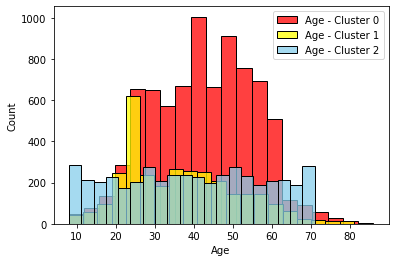

In [123]:
sns.histplot(cluster0['Age'],color='red',label='Age - Cluster 0', bins = 20)
sns.histplot(cluster1['Age'],color='yellow',label='Age - Cluster 1', bins = 20)
sns.histplot(cluster2['Age'],color='skyblue',label='Age - Cluster 2', bins = 20)
plt.legend()

In [124]:
centroids = model_cc_k3.cluster_centers_
centroids

array([[ 5.01195721e-01,  4.41464556e-01,  9.59345500e-01,
         7.38298311e-15,  9.36689742e-01,  6.33102580e-02,
         8.61422278e-01,  7.20620936e-01],
       [ 4.52107280e-01,  3.61475423e-01,  1.00000000e+00,
         9.64559387e-01, -4.16333634e-15,  3.54406130e-02,
         4.41251596e-01,  7.88101320e-01],
       [ 4.89243735e-01,  4.02775645e-01,  5.44009282e-15,
         8.86671102e-01, -3.16413562e-15,  1.13328898e-01,
         9.94899091e-01,  7.93893694e-01]])

In [125]:
centroid_0_Gender = centroids[0,0]
centroid_1_Gender = centroids[1,0]
centroid_2_Gender = centroids[2,0]
centroid_0_Age = centroids[0,1]
centroid_1_Age = centroids[1,1]
centroid_2_Age = centroids[2,1]
centroid_0_TypeTravel = centroids[0,2]
centroid_1_TypeTravel = centroids[1,2]
centroid_2_TypeTravel = centroids[2,2]
centroid_0_RoomType_double = centroids[0,3]
centroid_1_RoomType_double = centroids[1,3]
centroid_2_RoomType_double = centroids[2,3]
centroid_0_RoomType_single = centroids[0,4]
centroid_1_RoomType_single = centroids[1,4]
centroid_2_RoomType_single = centroids[2,4]
centroid_0_RoomType_suite = centroids[0,5]
centroid_1_RoomType_suite = centroids[1,5]
centroid_2_RoomType_suite = centroids[2,5]
centroid_0_Longevity = centroids[0,6]
centroid_1_Longevity = centroids[1,6]
centroid_2_Longevity = centroids[2,6]
centroid_0_RewardPoints_Bins = centroids[0,7]
centroid_1_RewardPoints_Bins = centroids[1,7]
centroid_2_RewardPoints_Bins = centroids[2,7]

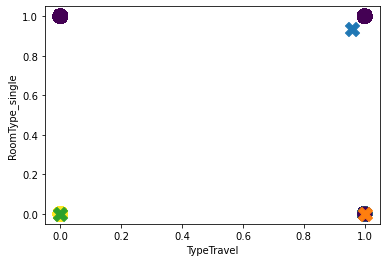

In [126]:
plt.scatter(db_customer_characteristics_k3.TypeTravel, db_customer_characteristics_k3.RoomType_single, c=db_customer_characteristics_k3.label, s=200)
plt.scatter(centroid_0_TypeTravel, centroid_0_RoomType_single, marker='X', s=200)
plt.scatter(centroid_1_TypeTravel, centroid_1_RoomType_single, marker='X', s=200)
plt.scatter(centroid_2_TypeTravel, centroid_2_RoomType_single, marker='X', s=200)
plt.xlabel("TypeTravel")
plt.ylabel("RoomType_single")
plt.show()

For k = 3, we can cleary distinguish two clusters again accordingly to the type of travel and room type.
1. In one of the clusters, we have customers who travel mainly because of business reasons and book single rooms.
2. In the second cluster cluster, we have customers who travel in leisure and book mainly double rooms.
3. In the last cluster, we have customers that travel by business reasons but instead book double rooms.

The longevity of the two first clusters mentioned above is high, which means that these are relatively "old customers" (> 1 year using our services). For the latter one is composed mainly by new customers (longevity < 1 year). There are no significant differences between clusters for the other variables.
Moreover, the first cluster contains about half of the total number of customers, while the remaining half is distributed between the remaining clusters more or less evenly.

We also decided to apply another clustering algorithm, DBSCAN, to compare clustering results or, eventually, unveil a different way of performing clustering on the same dataset.

## DBSCAN

In [127]:
# Apply DBSCAN 

from sklearn.cluster import DBSCAN

We performed a similar analysis (using the Nearest Neighbors classification algorithm) to the "elbow method" in order to determine which could be the best parameters for this algorithm (_eps_ and _min_samples_), which can be tough to tune.

Through this analysis, although, it seems like 20 clusters would be generated using relatively small values for the DBSCAN parameters. Looking at the dendrogram previously drawn for the agglomerative hierarchical clustering algorithm, this number is a resonable possibility; however, this does not suit out initial problem, once we want to segregate customers in distinct, comprehensible, clusters. Therefore, higher values for _eps_ and _min_samples_ were used in order to attain only 3 clusters, for _eps_ around 1 and 15 _min_samples_.

In [128]:
db_cc_dbscan = db_customer_characteristics_ready.copy()
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(db_customer_characteristics_ready)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 20
Estimated no. of noise points: 3


Text(0, 0.5, 'Distance')

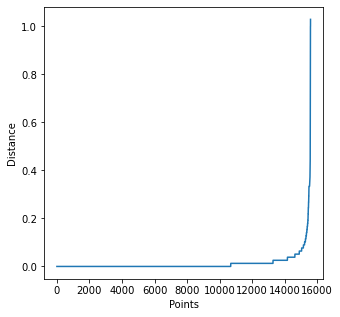

In [129]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(db_customer_characteristics_ready)

distances, indices = neighbors.kneighbors(db_customer_characteristics_ready)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [130]:
db_customer_characteristics_ready_dbscan = db_customer_characteristics_ready.copy()
model_cc_dbscan = DBSCAN(eps = 1, min_samples = 15, metric='euclidean').fit(db_customer_characteristics_ready_dbscan)

db_customer_characteristics_ready_dbscan['label'] = model_cc_dbscan.labels_

db_customer_characteristics_ready_dbscan.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_dbscan.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_dbscan.groupby(['label']).stdev().transpose()
db_customer_characteristics_ready_dbscan.groupby(['label']).count().transpose()

label,-1,0,1,2
Gender,1,7441,7019,1125
Age,1,7441,7019,1125
TypeTravel,1,7441,7019,1125
RoomType_double,1,7441,7019,1125
RoomType_single,1,7441,7019,1125
RoomType_suite,1,7441,7019,1125
Longevity,1,7441,7019,1125
RewardPoints_Bins,1,7441,7019,1125


In [131]:
db_customer_characteristics_ready_dbscan2 = db_customer_characteristics_ready.copy()
model_cc_dbscan2 = DBSCAN(eps = 1.2, min_samples = 15, metric='euclidean').fit(db_customer_characteristics_ready_dbscan2)

db_customer_characteristics_ready_dbscan2['label'] = model_cc_dbscan2.labels_

db_customer_characteristics_ready_dbscan2.groupby(['label']).mean().transpose()
#db_customer_characteristics_ready_dbscan2.groupby(['label']).median().transpose()
#db_customer_characteristics_ready_dbscan2.groupby(['label']).stdev().transpose()
#db_customer_characteristics_ready_dbscan2.groupby(['label']).count()

label,0,1,2
Gender,0.50,0.48,0.46
Age,0.44,0.39,0.41
TypeTravel,0.96,0.43,0.55
RoomType_double,0.00,1.00,0.00
RoomType_single,1.00,0.00,0.00
RoomType_suite,0.00,0.00,1.00
Longevity,0.85,0.76,0.90
RewardPoints_Bins,0.71,0.79,0.80


In [132]:
db_customer_characteristics_ready_dbscan2["label"].value_counts()

0    7442
1    7019
2    1125
Name: label, dtype: int64

Note that the points labeled with -1 are points located in low density regions (probably, outliers).
By analysing the results from the second execution of DBSCAN, we then identify clusters that segmented customers based on the room type they book.
1. In the first cluster, there are customers who stay in single rooms and travel mainly because of business reasons.
2. In the second cluster, there are customers who stay in double rooms and travel more in leisure.
3. In the third cluster, there are customers who stay in suites and travel more in business.

There are no significant differences in the remaining variables between clusters. 

We can definitely identify similarities between the first and second clusters of KMeans and DBSCAN, respectively. However, this analysis does not allow us to distinguish between "old" and "new" customers according to the their longevity.

Based on these analyses, we decide to keep the results from **KMeans for k = 3**, since the clusters allow us to make a clear distinction of the customers according their travel type and room type, besides providing a differentiation between "old" and "new" customers. All these aspects are of major interest when defining the marketing plan.

Moreover, as we are defining different perspectives to tackle our problem, we do not think it necessary to perform an even more in-depth profiling of the obtained clusters. The clusters from different perspectives will be concatenated later, thus any further insights will arise at that time.

## Customer Satisfaction

In the "Customer Satisfaction" perspective, we wanted to understand how satisfied our customers are towards each one of the satisfaction variables in our dataset.

In [133]:
db_hotel = db.drop(columns = ['Churn','RoomType_single','RoomType_double','RoomType_suite','Longevity', 'Age','TypeTravel', 'RewardPoints_Bins', 'AverageRating', 'Rating1', 'Rating2', 'Rating3','Gender'], axis=1)
print(db_hotel.shape)
db_hotel.head(5)

(15586, 14)


,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,1,4,4,3,4,3,3,3,3,4,3,4
1,1,1,1,1,5,3,4,5,5,5,5,1,5,2
2,3,3,3,3,1,4,4,3,3,2,3,2,3,1
3,1,1,1,1,4,4,5,4,4,4,4,4,4,3
4,2,2,3,2,5,5,5,5,5,3,4,1,3,5


Since 14 is a considerable number of variables, we apply PCA to understand if any further data reduction can be performed, taking into account the correlation structure of our dataset.

In [134]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle' , svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(db_hotel)

PCA(n_components='mle', svd_solver='full')

In [135]:
# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.

# The amount of variance explained by each of the selected components. Variance estimation: n_samples - 1 degrees of freedom
print("Number of Components: ",len(pca.explained_variance_),"\n") # dimensão: n_components
print(f"EigenValues: {list(map(lambda x: round(x,2),pca.explained_variance_))}\n")
print("% Variance explained by each of the selected components:")
print((pca.explained_variance_ratio_)*100,"\n") # dimensão: n_components
commulative = np.cumsum(pca.explained_variance_ratio_)
nComponents = np.argmax(commulative>0.85)
print(f"Sum of first {nComponents+1} components passes the 85% threshold: {round(sum(pca.explained_variance_ratio_[0:nComponents+1])*100,2)}%")
print(f"The first 3 components explain a total of {round(commulative[2]*100,2)}%")

Number of Components:  13 

EigenValues: [6.43, 4.7, 3.32, 1.73, 1.48, 1.06, 0.85, 0.79, 0.72, 0.59, 0.51, 0.5, 0.47]

% Variance explained by each of the selected components:
[27.37851877 20.041704   14.13168798  7.35811409  6.3010512   4.52501679
  3.64205787  3.36178757  3.07768528  2.50427302  2.18592617  2.11009998
  2.00919833] 

Sum of first 8 components passes the 85% threshold: 86.74%
The first 3 components explain a total of 61.55%


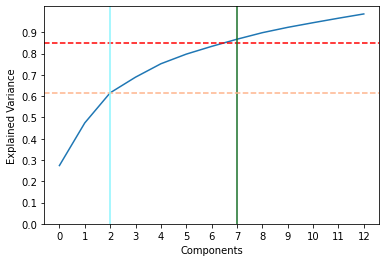

In [136]:
plt.plot(commulative)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xticks(np.arange(0, len(pca.explained_variance_), step=1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.axhline(y = 0.85, color = 'r', linestyle = 'dashed')  
plt.axvline(x = nComponents, color = '#176e27')
plt.axhline(y = commulative[2], color = '#feb48c', linestyle = 'dashed')  
plt.axvline(x = 2, color = '#8cf5fe')
plt.show()

Besides computing the eigenvalues and explained variance, we check the variables that accumulate the most importance in the PCA analysis (absolute sum of loading scores).

In [137]:
sumEigenVectors = [abs(x) for x in pca.components_[0:8]]
sumEigenVectors = list(map(sum,zip(*sumEigenVectors)))
Eigen = db_hotel.iloc[0:0]
Eigen.loc[len(sumEigenVectors)] = sumEigenVectors
Eigen.T.sort_values(14, ascending=False).T

C:\Users\jfred\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ReceptionSchedule,RoomSpace,Checkin,Location,Wifi,Staff,Comfort,Amenities,PriceQuality,FoodDrink,CheckOut,OnlineBooking,Cleanliness,BarService
14,2.25,2.02,1.99,1.94,1.93,1.76,1.73,1.63,1.56,1.33,1.24,1.22,1.22,1.16


We also display the eigenvectors and the correlation matrix, from which we can understand how correlated are the variables from our original dataset with the principal components that explained at least 85% of variance in our dataset, highliting higher and moderate correlations. We observe that:
- Component 0: Best correlation is with Online Booking: -0.42
- Component 1: Moderate correlation with Reception Schedule (0.50) and FoodDrink (0.50)
- Component 2: Best correlation with Price Quality (-0.42) and Check Out (-0.41)
- Component 3: Moderate correlation with Amenities (0.63)
- Component 4: Strong correlation with Check-in (-0.82)
- Component 5: Strong correlation with Room Space (0.84)
- Component 6: Best correlation with Wifi (0.46) and Staff (-0.44)
- Component 7: Moderate correlation with Reception Schedule (0.61) and Location (-0.66)

In [138]:
hotel_components = pd.DataFrame(pca.components_[0:8], columns = db_hotel.columns).T
pd.set_option('precision', 2)
hotel_components.style.apply(lambda x: ["background: #0971DA" if abs(v) > 0.75 else "background: #6dedeb" if abs(v) > 0.5 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7
Comfort,-0.26,0.39,0.05,-0.23,0.26,-0.16,0.34,0.03
ReceptionSchedule,-0.14,0.50,-0.02,0.32,-0.32,0.03,-0.30,0.61
FoodDrink,-0.19,0.50,0.06,-0.17,0.16,-0.04,0.14,-0.07
Location,-0.11,0.43,0.05,0.37,-0.12,0.16,-0.05,-0.66
Wifi,-0.31,-0.18,0.35,0.23,0.01,-0.10,0.46,0.29
Amenities,-0.31,0.05,0.12,-0.64,0.11,-0.05,-0.32,0.03
Staff,-0.36,-0.17,0.29,-0.02,-0.11,0.17,-0.45,-0.19
OnlineBooking,-0.42,-0.20,0.02,0.24,0.17,-0.07,0.05,-0.04
PriceQuality,-0.25,-0.07,-0.42,0.04,0.05,-0.28,-0.35,0.09
RoomSpace,-0.22,-0.05,-0.38,-0.03,0.22,0.84,0.13,0.14


We can draw several conclusions from this analysis:
- The results from the PCA show that performing variable reductionn may not be necessary. We would still need 8 variables to represent more than 85% of our data.
- The first 3 principal components explain a total of 61.26% of our dataset.
- The first principal 4 components don not show strong correlations with any variables from our dataset, unlike what we might be expecting.
    - The first component, representing 27.43%, does not show even a moderate correlation with any variable, nor does the third component.
    - The second component, representing 19.84%, shows a moderate correlation with Reception Schedule and Food Drink.
    - The forth component, representing 7.37%, shows a moderate correlation with Amenities.
    
From this analysis we conclude that implementing a PCA analysis on the "Customer Satisfaction" variables does not present great advantages.

This way, we perfomed clustering with all the 14 variables. Nevertheless, an analysis encompassing these variables into buckets would be more fruitful.

## KMeans

The elbow method suggests that k = 2/3 might be suitable for our problem.
For perfomance issues, given that we are using a high number of variables (14) to perform clustering, we decided not to apply the agglomerative hierachical clustering.

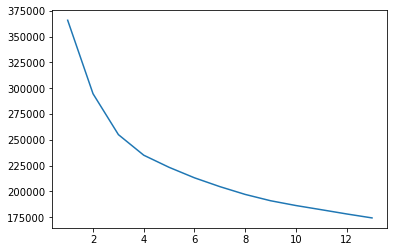

In [139]:
ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(db_hotel)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
# 3 clusters suits best. Check for 4 and 5

##### 2 Clusters

In [140]:
# Data with 2 Clusters

df_k2 = db_hotel.copy()
model_k2 = KMeans(n_clusters=2, random_state=100).fit(df_k2)
df_k2['label'] = model_k2.labels_

df_k2.groupby(['label']).mean().transpose()
#df_k2.groupby(['label']).median().transpose()
#df_k2.groupby(['label']).stdev().transpose()
#df_k2.groupby(['label']).count().transpose()

label,0,1
Comfort,2.42,3.21
ReceptionSchedule,2.93,3.13
FoodDrink,2.66,3.05
Location,2.92,3.03
Wifi,2.39,3.86
Amenities,2.66,3.92
Staff,2.51,4.22
OnlineBooking,2.28,4.29
PriceQuality,2.83,3.91
RoomSpace,2.93,3.86


In [141]:
dists = euclidean_distances(model_k2.cluster_centers_)
dists

array([[0.        , 4.33500412],
       [4.33500412, 0.        ]])

In [142]:
df_k2["label"].value_counts()

1    9086
0    6500
Name: label, dtype: int64

##### 3 Clusters

In [143]:
df_k3 = db_hotel.copy()
model_k3 = KMeans(n_clusters=3, random_state=100).fit(df_k3)
df_k3['label'] = model_k3.labels_

df_k3.groupby(['label']).mean().transpose()
#df_k3.groupby(['label']).median().transpose()
#df_k3.groupby(['label']).stdev().transpose()
#df_k3.groupby(['label']).count().transpose()

label,0,1,2
Comfort,2.43,4.04,2.01
ReceptionSchedule,3.06,3.97,1.95
FoodDrink,2.77,3.97,1.76
Location,3.01,3.80,2.00
Wifi,2.18,3.69,3.89
Amenities,2.60,4.13,3.41
Staff,2.31,4.08,4.15
OnlineBooking,2.06,4.14,4.18
PriceQuality,2.78,3.89,3.69
RoomSpace,2.90,3.87,3.63


In [144]:
dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[0.        , 5.01659552, 4.63688291],
       [5.01659552, 0.        , 4.13380717],
       [4.63688291, 4.13380717, 0.        ]])

In [145]:
df_k3["label"].value_counts()

1    5597
0    5233
2    4756
Name: label, dtype: int64

##### 4 Clusters

In [146]:
df_k4 = db_hotel.copy()
model_k4 = KMeans(n_clusters=4, random_state=100).fit(df_k4)
df_k4['label'] = model_k4.labels_

df_k4.groupby(['label']).mean().transpose()
#df_k4.groupby(['label']).median().transpose()
#df_k4.groupby(['label']).stdev().transpose()
#df_k4.groupby(['label']).count().transpose()

label,0,1,2,3
Comfort,2.59,4.26,2.12,2.44
ReceptionSchedule,2.65,4.23,2.14,3.14
FoodDrink,2.62,4.22,1.98,2.69
Location,2.84,4.03,2.08,2.99
Wifi,3.53,3.69,3.79,1.76
Amenities,3.22,4.12,3.70,2.35
Staff,3.64,4.05,4.20,1.87
OnlineBooking,3.00,4.15,4.36,1.96
PriceQuality,2.22,3.94,4.17,3.23
RoomSpace,2.39,3.91,4.08,3.27


In [147]:
dists = euclidean_distances(model_k4.cluster_centers_)
dists

array([[0.        , 4.80730896, 4.28267551, 4.01676846],
       [4.80730896, 0.        , 4.27190715, 5.54873235],
       [4.28267551, 4.27190715, 0.        , 5.27172157],
       [4.01676846, 5.54873235, 5.27172157, 0.        ]])

In [148]:
df_k4["label"].value_counts()

2    4352
1    4232
3    3542
0    3460
Name: label, dtype: int64

##### 5 Clusters

In [149]:
df_k5 = db_hotel.copy()
model_k5 = KMeans(n_clusters=5, random_state=100).fit(df_k5)
df_k5['label'] = model_k5.labels_

df_k5.groupby(['label']).mean().transpose()
#df_k5.groupby(['label']).median().transpose()
#df_k5.groupby(['label']).stdev().transpose()
#df_k5.groupby(['label']).count().transpose()

label,0,1,2,3,4
Comfort,4.30,2.34,2.10,3.02,2.36
ReceptionSchedule,4.21,3.00,2.18,3.79,1.99
FoodDrink,4.19,2.46,2.06,3.80,1.90
Location,4.01,2.84,2.06,3.68,2.37
Wifi,3.72,1.74,3.72,2.85,3.94
Amenities,4.15,2.24,3.88,3.42,2.96
Staff,4.09,1.81,4.24,3.17,3.88
OnlineBooking,4.23,1.95,4.41,2.39,3.61
PriceQuality,4.05,3.36,4.32,2.19,2.59
RoomSpace,3.96,3.32,4.23,2.61,2.63


In [150]:
dists = euclidean_distances(model_k5.cluster_centers_)
dists

array([[0.        , 5.84441395, 4.20936724, 4.62420069, 5.13809888],
       [5.84441395, 0.        , 5.34321047, 3.8991783 , 4.63224001],
       [4.20936724, 5.34321047, 0.        , 5.7652938 , 3.61797404],
       [4.62420069, 3.8991783 , 5.7652938 , 0.        , 3.76570191],
       [5.13809888, 4.63224001, 3.61797404, 3.76570191, 0.        ]])

In [151]:
df_k5["label"].value_counts()

0    3936
2    3653
1    3094
4    2726
3    2177
Name: label, dtype: int64

In [152]:
# Compare clusters

dataframe = pd.concat([
#            df_k2.groupby(['label']).mean().transpose(),
#            df_k3.groupby(['label']).mean().transpose(),
#            df_k4.groupby(['label']).mean().transpose(),
           df_k5.groupby(['label']).mean().transpose()
          ], axis=1)
# dataframe.style.apply(lambda x: ["background: #6dedeb" if abs(v) > 0.49 else "" for v in x], axis = 1)
dataframe.style.background_gradient(cmap="Blues", vmin=2.9)



label,0,1,2,3,4
Comfort,4.30,2.34,2.10,3.02,2.36
ReceptionSchedule,4.21,3.00,2.18,3.79,1.99
FoodDrink,4.19,2.46,2.06,3.80,1.90
Location,4.01,2.84,2.06,3.68,2.37
Wifi,3.72,1.74,3.72,2.85,3.94
Amenities,4.15,2.24,3.88,3.42,2.96
Staff,4.09,1.81,4.24,3.17,3.88
OnlineBooking,4.23,1.95,4.41,2.39,3.61
PriceQuality,4.05,3.36,4.32,2.19,2.59
RoomSpace,3.96,3.32,4.23,2.61,2.63


In [154]:
df_k5.groupby('label').mean()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
label,,,,,,,,,,,,,,
0,4.30,4.21,4.19,4.01,3.72,4.15,4.09,4.23,4.05,3.96,4.19,3.71,4.20,3.93
1,2.34,3.00,2.46,2.84,1.74,2.24,1.81,1.95,3.36,3.32,3.78,3.11,3.78,1.70
2,2.10,2.18,2.06,2.06,3.72,3.88,4.24,4.41,4.32,4.23,4.43,3.84,4.43,4.01
3,3.02,3.79,3.80,3.68,2.85,3.42,3.17,2.39,2.19,2.61,2.45,2.71,2.40,2.81
4,2.36,1.99,1.90,2.37,3.94,2.96,3.88,3.61,2.59,2.63,2.93,2.84,2.89,3.90


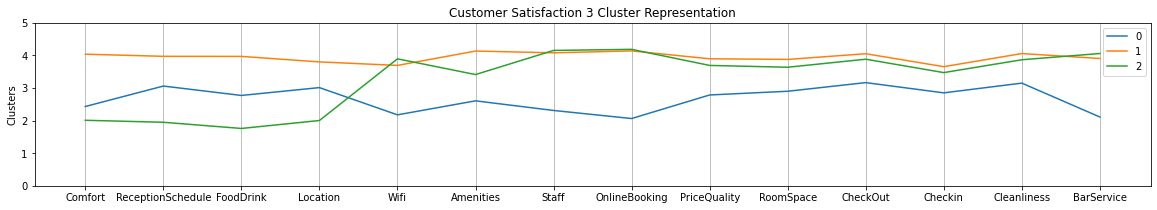

In [155]:
plt.figure(figsize=(20, 3))
plt.plot(df_k3.groupby('label').mean().T.iloc[0:])
plt.grid(axis="x")
plt.legend(range(0,3))
plt.yticks(range(0,6))
plt.title('Customer Satisfaction 3 Cluster Representation')
plt.ylabel('Clusters')
plt.show()

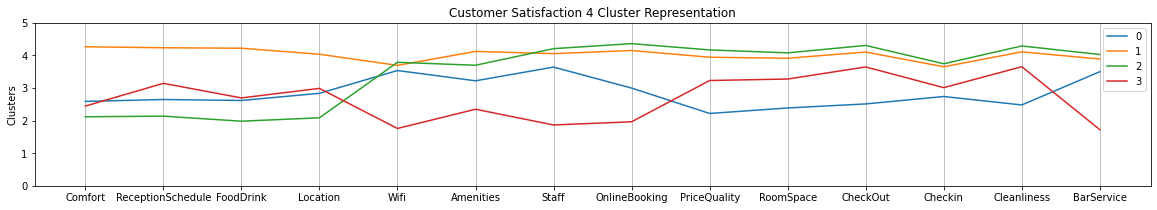

In [156]:
plt.figure(figsize=(20, 3))
plt.plot(df_k4.groupby('label').mean().T.iloc[0:])
plt.grid(axis="x")
plt.legend(range(0,4))
plt.yticks(range(0,6))
plt.title('Customer Satisfaction 4 Cluster Representation')
plt.ylabel('Clusters')
plt.show()

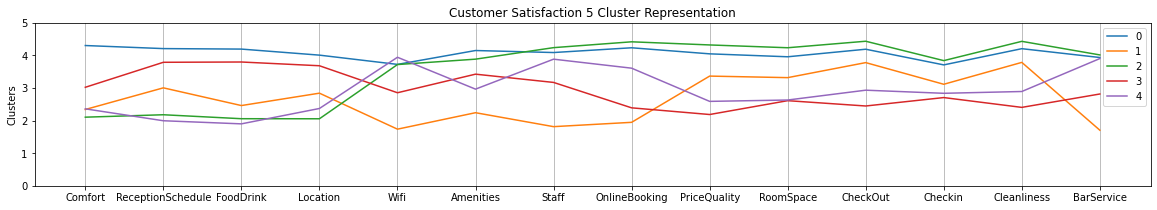

In [157]:
plt.figure(figsize=(20, 3))
plt.plot(df_k5.groupby('label').mean().T.iloc[0:])
plt.grid(axis="x")
plt.legend(range(0,5))
plt.yticks(range(0,6))
plt.title('Customer Satisfaction 5 Cluster Representation')
plt.ylabel('Clusters')
plt.show()

In the case of k = 5, there are some interesting remarks:
1. We do have a cluster composed of customers who give positive classifications to all satisfaction variables.
2. Other cluster is composed of customers that overall do not give very positive classifications to all satisfaction variables.
3. The remaining three clusters do make a distinction between classifications according to three buckets of variables defined a priori, _Rating1_, _Rating2_ and _Rating3_. 

These results corroborate the findings in the exploration and pre-processing stage, since now we are precisely segmenting our customers according to the rating variables _Rating1_, _Rating2_ and _Rating3_ created.

## DBSCAN

In [158]:
from sklearn.cluster import DBSCAN

In [159]:
db_hotel_dbscan = db_hotel.copy()
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(db_hotel)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 36
Estimated no. of noise points: 15382


Text(0, 0.5, 'Distance')

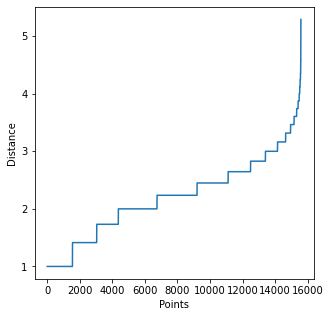

In [160]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(db_hotel)

distances, indices = neighbors.kneighbors(db_hotel)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [161]:
db_hotel_dbscan2 = db_hotel.copy()
dbscan_cluster2 = DBSCAN(eps = 3, min_samples = 15, metric='euclidean').fit(db_hotel_dbscan2)

In [162]:
db_hotel_dbscan2['label'] = dbscan_cluster2.labels_

#db_cs_dbscan.groupby(['label']).describe().transpose()
db_hotel_dbscan2.groupby(['label']).mean().transpose()

label,-1,0
Comfort,2.86,2.88
ReceptionSchedule,3.15,3.04
FoodDrink,2.70,2.90
Location,2.53,3.00
Wifi,3.15,3.25
Amenities,2.85,3.41
Staff,2.99,3.52
OnlineBooking,3.14,3.46
PriceQuality,3.13,3.47
RoomSpace,2.95,3.49


DBSCAN executions segmented customers into a very high number of clusters, which do not suit our analysis. From this result, we conclude that for problems like ours, KMeans is more suitable.

We therefore decided to keep the results from **KMeans for k = 5**, since it corroborates our previous assumptions. We move forward to a third perspective that will take into account the _Rating1_, _Rating2_ and _Rating3_ buckets of variables.

## Quality of service

In our third and last perspective, we used the variable _Churn_ and the different rating variables _Rating1_, _Rating2_ and _Rating3_, created while pre-processing the dataset and whose significance was reinforced when analysing the results for the "Customer Satisfaction" perspective. Here, the main goal is to relate the quality of the overall service provided to the customers and the fact that they churn or not. What is making customers leave BookMe?

In [163]:
db_cs = db[['Churn','Rating1','Rating2','Rating3']].copy()
db_cs

,Churn,Rating1,Rating2,Rating3
0,1,3.00,3.6,3.2
1,0,1.00,3.8,4.2
2,1,3.00,2.6,2.6
3,0,1.00,4.0,4.0
4,0,2.25,5.0,3.2
...,...,...,...,...
15581,1,1.75,3.0,3.4
15582,1,3.00,4.6,3.0
15583,0,1.00,4.0,4.2
15584,0,3.75,4.8,3.6


## KMeans

In this case, we do think it was necessary to perform PCA. Firstly, because only four variables are being considered to perfom the clustering. Secondly, because we have already gathered very meaningful results from the previous clustering analysis on such variables. Also, there is not a variable that varies between a completely different range than the others, so perhaps normalization was not needed as well. So we move forward to apply KMeans.

Again, we used the elbow method and the dendrogram provided by the agglomerative hierarchical clustering to estimate a suitable number of clusters. The elbow method suggested k = 3/4, while the results of the dendrogram were more difficult to interpret. 

In [164]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    #model = KMeans(n_clusters=k, init ='k-means++')

    # Fit model to samples
    model.fit(db_cs)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

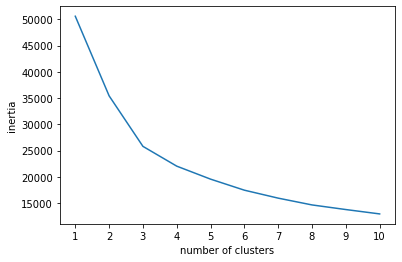

In [165]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

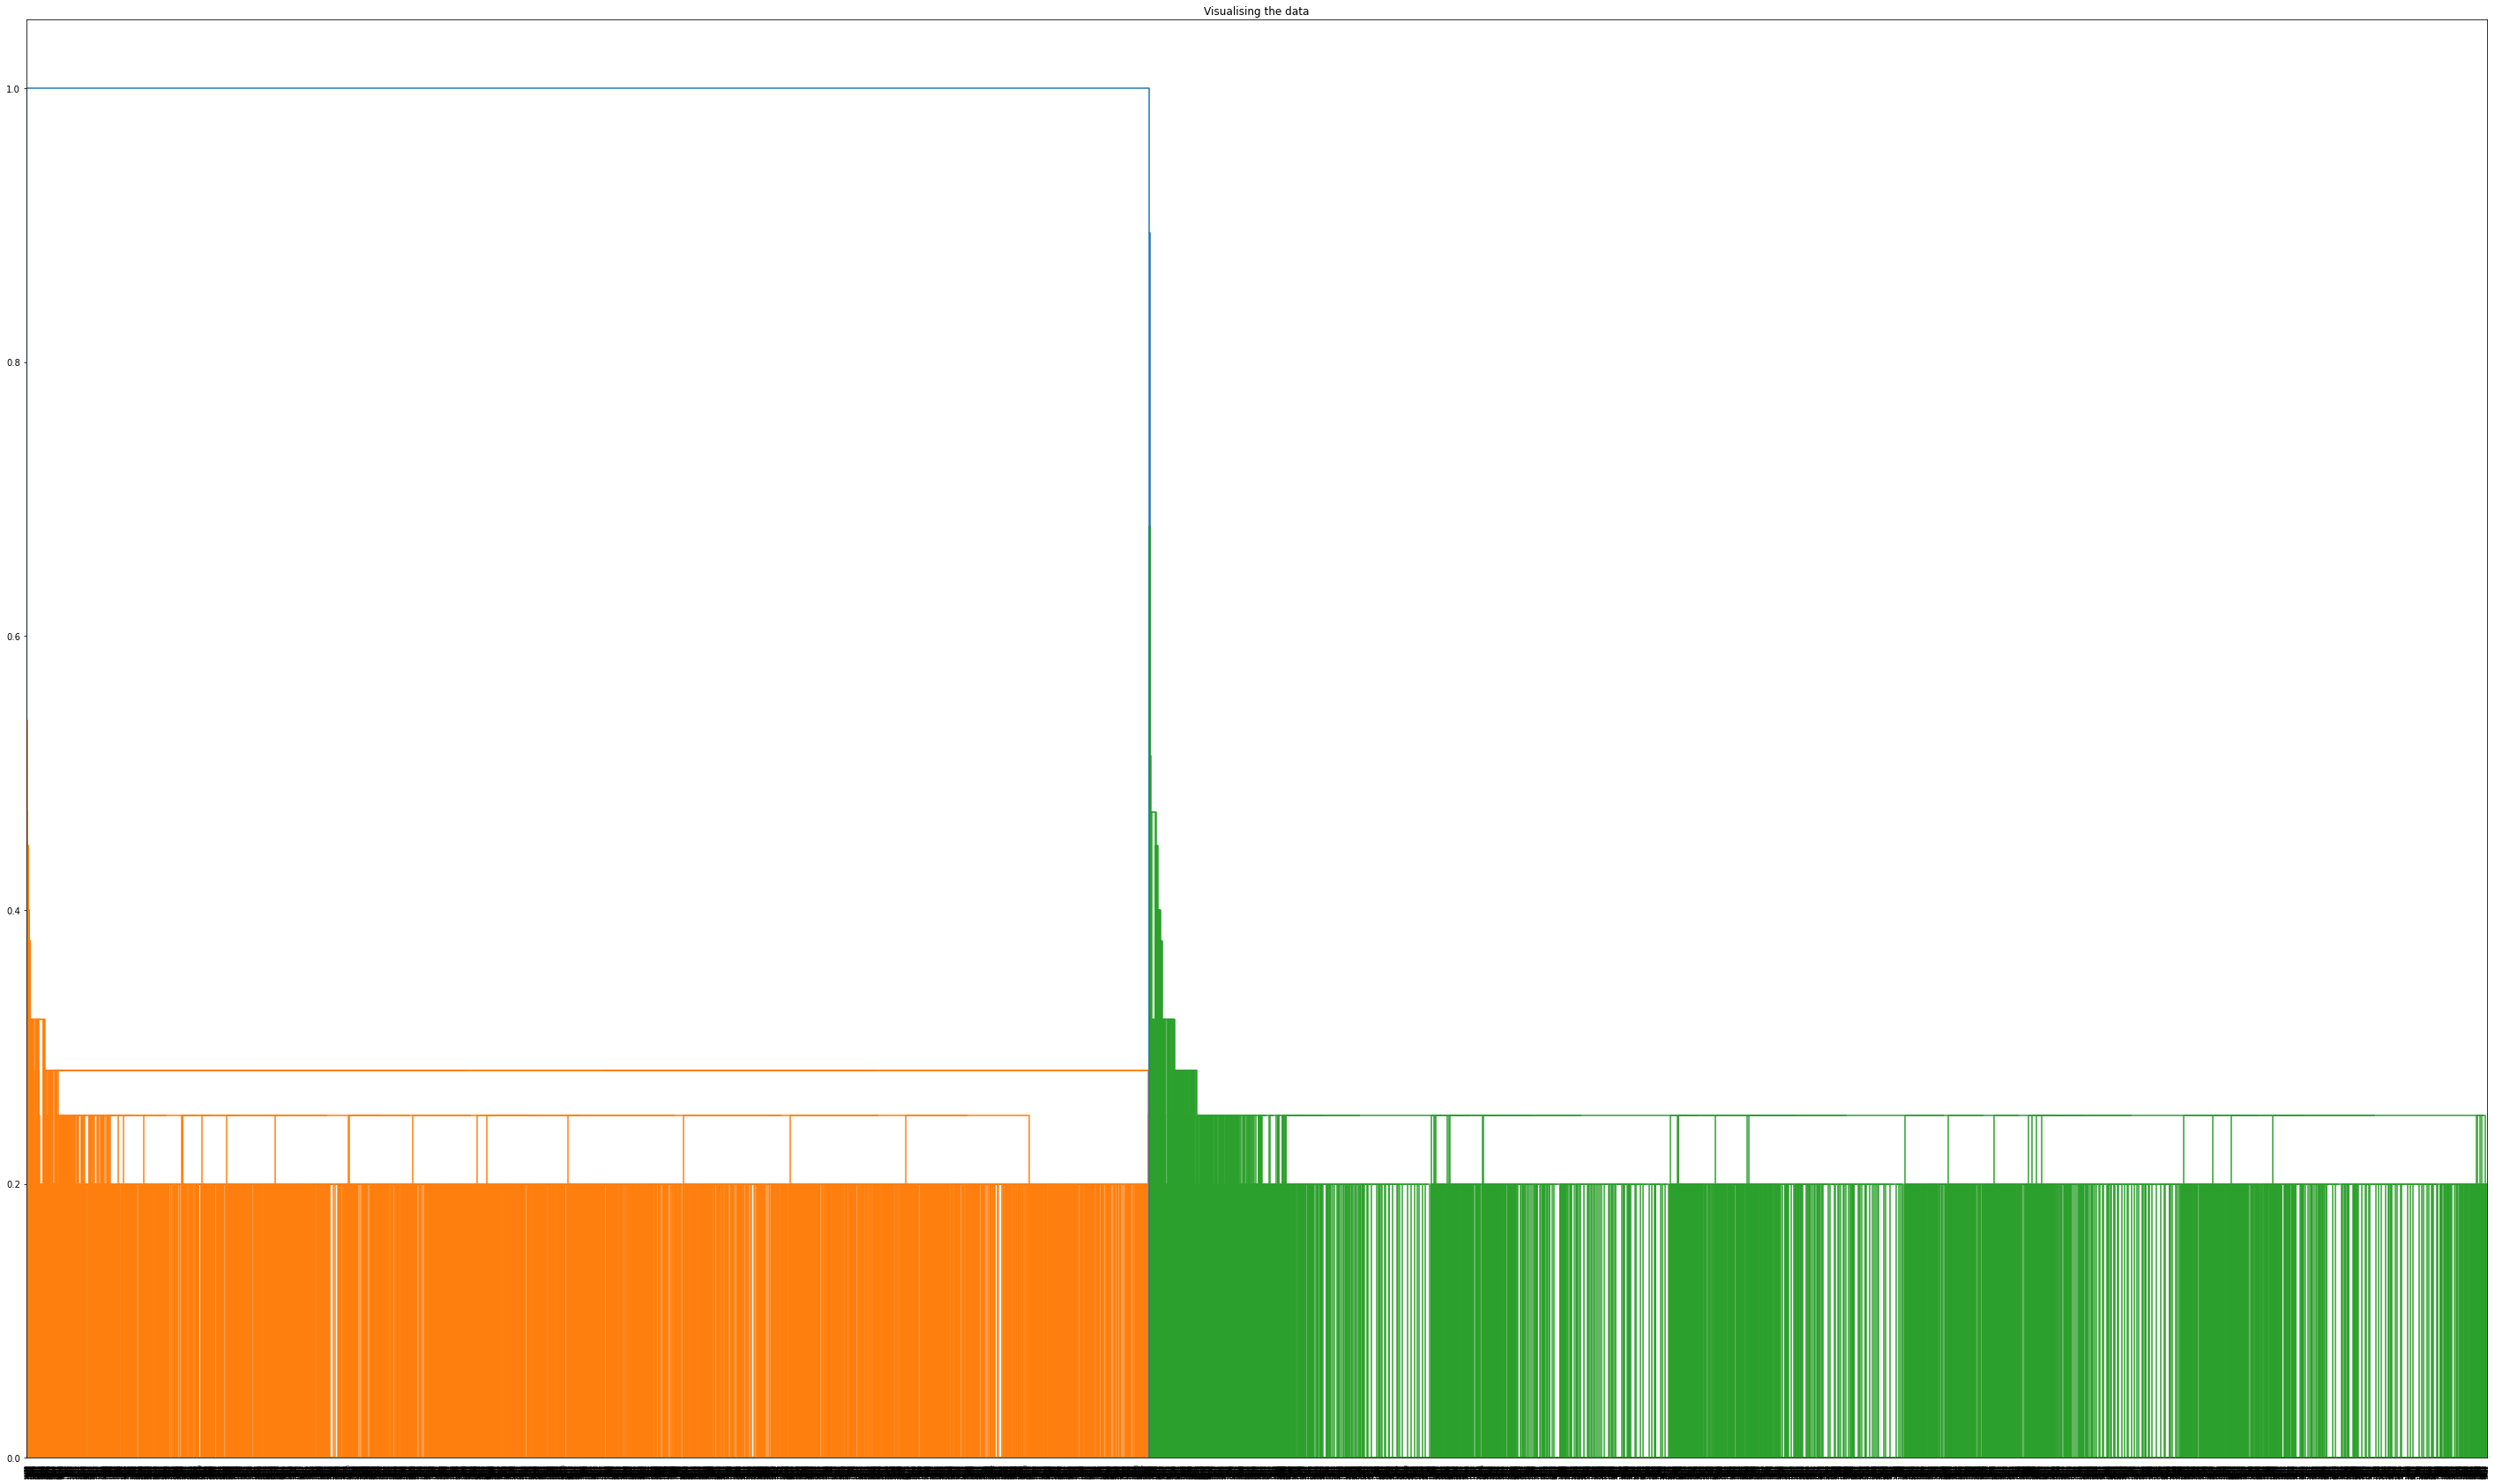

In [166]:
# Dendrogram - Hierarchical clustering

db_cs_hc = shc.linkage(db_cs)
plt.figure(figsize =(50, 30))
plt.title('Visualising the data')
dendrogram_data = shc.dendrogram(db_cs_hc)

##### 2 Clusters

In [167]:
# k = 2
model_k2 = KMeans(n_clusters=2)
# model_k2 = KMeans(n_clusters=2, init ='k-means++')
db_cs_k2 = db_cs.copy()
model_k2.fit(db_cs_k2)
db_cs_k2['label'] = model_k2.labels_
db_cs_k2.groupby(['label']).mean().transpose()
#db_cs_k2.groupby(['label']).median().transpose()
#db_cs_k2.groupby(['label']).stdev().transpose()
#db_cs_k2.groupby(['label']).count().transpose()

label,0,1
Churn,0.80,0.20
Rating1,2.68,3.16
Rating2,2.48,4.08
Rating3,3.01,3.92


In [168]:
dists = euclidean_distances(model_k2.cluster_centers_)
dists

array([[0.        , 1.99290763],
       [1.99290763, 0.        ]])

In [169]:
db_cs_k2["label"].value_counts()

1    8893
0    6693
Name: label, dtype: int64

##### 3 Clusters

In [170]:
# k = 3
model_k3 = KMeans(n_clusters=3)
# model_k3 = KMeans(n_clusters=3, init ='k-means++')
db_cs_k3 = db_cs.copy()
model_k3.fit(db_cs_k3)
db_cs_k3['label'] = model_k3.labels_
db_cs_k3.groupby(['label']).mean().transpose()

label,0,1,2
Churn,0.24,0.23,0.85
Rating1,2.10,4.14,2.70
Rating2,4.03,3.92,2.33
Rating3,3.87,3.81,2.97


In [171]:
dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[0.        , 2.04673523, 2.10653185],
       [2.04673523, 0.        , 2.38574548],
       [2.10653185, 2.38574548, 0.        ]])

In [172]:
db_cs_k3["label"].value_counts()

2    5582
0    5171
1    4833
Name: label, dtype: int64

##### 4 Clusters

In [173]:
# k = 4
model_k4 = KMeans(n_clusters=4)
# model_k4 = KMeans(n_clusters=4, init ='k-means++')
db_cs_k4 = db_cs.copy()
model_k4.fit(db_cs_k4)
db_cs_k4['label'] = model_k4.labels_
db_cs_k4.groupby(['label']).mean().transpose()

label,0,1,2,3
Churn,0.83,0.17,0.20,0.78
Rating1,2.75,2.07,4.18,2.66
Rating2,1.93,4.06,3.96,3.26
Rating3,3.44,4.08,3.89,2.46


In [174]:
dists = euclidean_distances(model_k4.cluster_centers_)
dists

array([[0.        , 2.42227842, 2.60164019, 1.65230337],
       [2.42227842, 0.        , 2.12526775, 1.99695953],
       [2.60164019, 2.12526775, 0.        , 2.27757544],
       [1.65230337, 1.99695953, 2.27757544, 0.        ]])

In [175]:
db_cs_k4["label"].value_counts()

2    4455
1    4323
0    3408
3    3400
Name: label, dtype: int64

For k = 3 and k = 4, we also carried out more visual and in-depth analyses to help us determining which customer segmentation is preferred.

##### 3 Clusters

In [176]:
cluster0 = db_cs_k3[db_cs_k3.label==0]
cluster1 = db_cs_k3[db_cs_k3.label==1]
cluster2 = db_cs_k3[db_cs_k3.label==2]

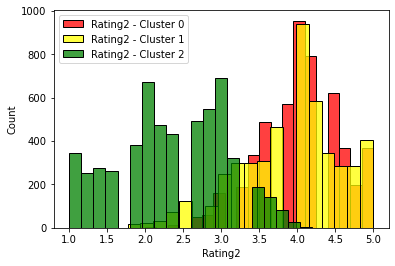

In [177]:
sns.histplot(cluster0['Rating2'],color='red',label='Rating2 - Cluster 0', bins = 20)
sns.histplot(cluster1['Rating2'],color='yellow',label='Rating2 - Cluster 1', bins = 20)
sns.histplot(cluster2['Rating2'],color='green',label='Rating2 - Cluster 2', bins = 20)
plt.legend()

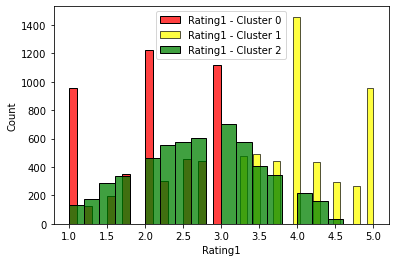

In [178]:
sns.histplot(cluster0['Rating1'],color='red',label='Rating1 - Cluster 0', bins = 20)
sns.histplot(cluster1['Rating1'],color='yellow',label='Rating1 - Cluster 1', bins = 20)
sns.histplot(cluster2['Rating1'],color='green',label='Rating1 - Cluster 2', bins = 20)
plt.legend()

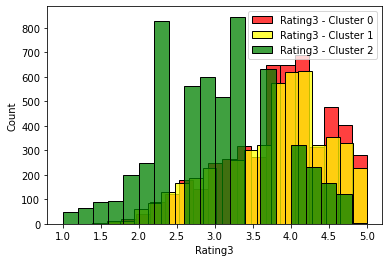

In [179]:
sns.histplot(cluster0['Rating3'],color='red',label='Rating3 - Cluster 0', bins = 20)
sns.histplot(cluster1['Rating3'],color='yellow',label='Rating3 - Cluster 1', bins = 20)
sns.histplot(cluster2['Rating3'],color='green',label='Rating3 - Cluster 2', bins = 20)
plt.legend()

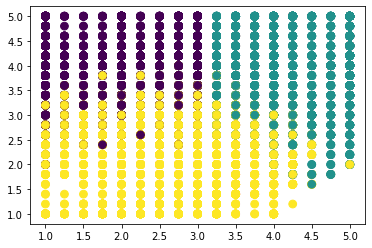

In [180]:
plt.scatter(db_cs_k3.Rating1, db_cs_k3.Rating2, c=db_cs_k3.label, s=60)

##### 4 Clusters

In [181]:
cluster0 = db_cs_k4[db_cs_k4.label==0]
cluster1 = db_cs_k4[db_cs_k4.label==1]
cluster2 = db_cs_k4[db_cs_k4.label==2]
cluster3 = db_cs_k4[db_cs_k4.label==3]

In [182]:
descr = db_cs_k4.groupby(['label']).describe().transpose()
descr

label                0        1        2        3
Churn   count  3408.00  4323.00  4455.00  3400.00
        mean      0.83     0.17     0.20     0.78
        std       0.37     0.37     0.40     0.42
        min       0.00     0.00     0.00     0.00
        25%       1.00     0.00     0.00     1.00
        50%       1.00     0.00     0.00     1.00
        75%       1.00     0.00     0.00     1.00
        max       1.00     1.00     1.00     1.00
Rating1 count  3408.00  4323.00  4455.00  3400.00
        mean      2.75     2.07     4.18     2.66
        std       0.81     0.72     0.56     0.81
        min       1.00     1.00     3.25     1.00
        25%       2.25     1.50     3.75     2.00
        50%       2.75     2.00     4.00     2.75
        75%       3.25     2.75     4.75     3.25
        max       4.75     3.25     5.00     5.00
Rating2 count  3408.00  4323.00  4455.00  3400.00
        mean      1.93     4.06     3.96     3.26
        std       0.56     0.53     0.65     0.65
        min       1.00     2.20     1.80     1.40
        25%       1.40     3.80     3.60     2.80
        50%       2.00     4.00     4.00     3.20
        75%       2.40     4.40     4.40     3.80
        max       3.20     5.00     5.00     5.00
Rating3 count  3408.00  4323.00  4455.00  3400.00
        mean      3.44     4.08     3.89     2.46
        std       0.68     0.55     0.68     0.55
        min       1.20     2.20     1.60     1.00
        25%       3.00     3.80     3.40     2.20
        50%       3.40     4.00     4.00     2.60
        75%       4.00     4.60     4.40     2.80
        max       5.00     5.00     5.00     3.80

In [183]:
dists = euclidean_distances(model_k4.cluster_centers_)
dists

array([[0.        , 2.42227842, 2.60164019, 1.65230337],
       [2.42227842, 0.        , 2.12526775, 1.99695953],
       [2.60164019, 2.12526775, 0.        , 2.27757544],
       [1.65230337, 1.99695953, 2.27757544, 0.        ]])

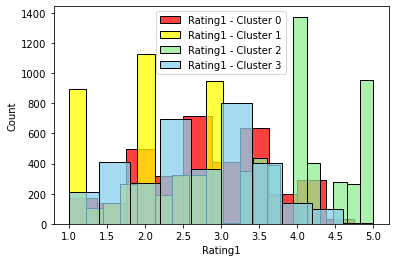

In [184]:
sns.histplot(cluster0['Rating1'],color='red',label='Rating1 - Cluster 0', bins = 10)
sns.histplot(cluster1['Rating1'],color='yellow',label='Rating1 - Cluster 1', bins = 10)
sns.histplot(cluster2['Rating1'],color='lightgreen',label='Rating1 - Cluster 2', bins = 10)
sns.histplot(cluster3['Rating1'],color='skyblue',label='Rating1 - Cluster 3', bins = 10)
plt.legend()

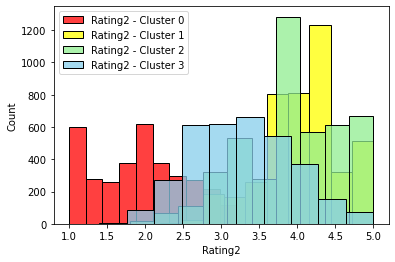

In [185]:
sns.histplot(cluster0['Rating2'],color='red',label='Rating2 - Cluster 0', bins = 10)
sns.histplot(cluster1['Rating2'],color='yellow',label='Rating2 - Cluster 1', bins = 10)
sns.histplot(cluster2['Rating2'],color='lightgreen',label='Rating2 - Cluster 2', bins = 10)
sns.histplot(cluster3['Rating2'],color='skyblue',label='Rating2 - Cluster 3', bins = 10)
plt.legend()

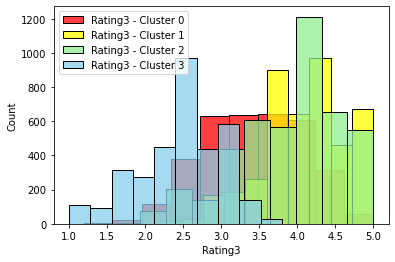

In [186]:
sns.histplot(cluster0['Rating3'],color='red',label='Rating3 - Cluster 0', bins = 10)
sns.histplot(cluster1['Rating3'],color='yellow',label='Rating3 - Cluster 1', bins = 10)
sns.histplot(cluster2['Rating3'],color='lightgreen',label='Rating3 - Cluster 2', bins = 10)
sns.histplot(cluster3['Rating3'],color='skyblue',label='Rating3 - Cluster 3', bins = 10)
plt.legend()

In [187]:
centroids = model_k4.cluster_centers_
centroids

array([[0.83094052, 2.75161149, 1.92839144, 3.43891005],
       [0.16809249, 2.0683237 , 4.0623815 , 4.07708671],
       [0.2037702 , 4.18222621, 3.96027828, 3.88608618],
       [0.77830189, 2.65750295, 3.25483491, 2.45961085]])

In [188]:
centroid_0_Churn = centroids[0,0]
centroid_1_Churn = centroids[1,0]
centroid_2_Churn = centroids[2,0]
centroid_3_Churn = centroids[3,0]
centroid_0_Rating1 = centroids[0,1]
centroid_1_Rating1 = centroids[1,1]
centroid_2_Rating1 = centroids[2,1]
centroid_3_Rating1 = centroids[3,1]
centroid_0_Rating2 = centroids[0,2]
centroid_1_Rating2 = centroids[1,2]
centroid_2_Rating2 = centroids[2,2]
centroid_3_Rating2 = centroids[3,2]
centroid_0_Rating3 = centroids[0,3]
centroid_1_Rating3 = centroids[1,3]
centroid_2_Rating3 = centroids[2,3]
centroid_3_Rating3 = centroids[3,3]

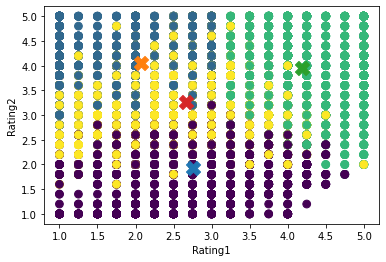

In [189]:
plt.scatter(db_cs_k4.Rating1, db_cs_k4.Rating2, c=db_cs_k4.label, s=60)
plt.scatter(centroid_0_Rating1, centroid_0_Rating2, marker='X', s=200)
plt.scatter(centroid_1_Rating1, centroid_1_Rating2, marker='X', s=200)
plt.scatter(centroid_2_Rating1, centroid_2_Rating2, marker='X', s=200)
plt.scatter(centroid_3_Rating1, centroid_3_Rating2, marker='X', s=200)
plt.xlabel("Rating1")
plt.ylabel("Rating2")
plt.show()

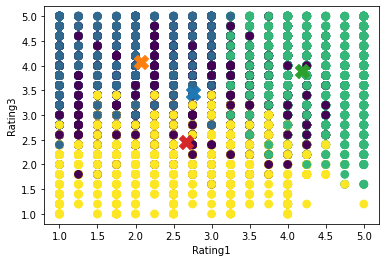

In [190]:
plt.scatter(db_cs_k4.Rating1, db_cs_k4.Rating3, c=db_cs_k4.label, s=60)
plt.scatter(centroid_0_Rating1, centroid_0_Rating3, marker='X', s=200)
plt.scatter(centroid_1_Rating1, centroid_1_Rating3, marker='X', s=200)
plt.scatter(centroid_2_Rating1, centroid_2_Rating3, marker='X', s=200)
plt.scatter(centroid_3_Rating1, centroid_3_Rating3, marker='X', s=200)
plt.xlabel("Rating1")
plt.ylabel("Rating3")
plt.show()

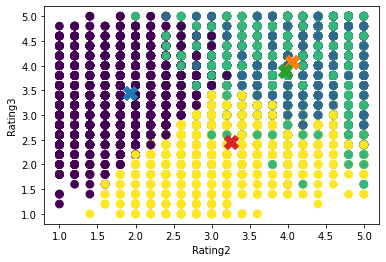

In [191]:
plt.scatter(db_cs_k4.Rating2, db_cs_k4.Rating3, c=db_cs_k4.label, s=60)
plt.scatter(centroid_0_Rating2, centroid_0_Rating3, marker='X', s=200)
plt.scatter(centroid_1_Rating2, centroid_1_Rating3, marker='X', s=200)
plt.scatter(centroid_2_Rating2, centroid_2_Rating3, marker='X', s=200)
plt.scatter(centroid_3_Rating2, centroid_3_Rating3, marker='X', s=200)
plt.xlabel("Rating2")
plt.ylabel("Rating3")
plt.show()

Using k = 4 clusters, we are in fact able to differentiate two distinct behavious among the customers who churn and not. For instance, our clusters are:
1. Customers who do not churn and give positive classifications in all _Rating1_, _Rating2_, _Rating3_: customers who are overall satisfied and, therefore, do not abandon our services.
2. Customers who do not churn and give a positive classification in _Rating2_ and _Rating3_, but have a low classification in _Rating1_.
3. Customers who churn despite the positive classification in _Rating3_. To _Rating2_, a low classification is given. 
4. Customers who churn despite the positive classification in _Rating2_. To _Rating3_, a low classification is given.

From these conclusions, variable _Rating1_ does not appear to be determinant to churn, whereas _Rating2_ and _Rating3_ are. Besides, the customers who not churn are distributed evenly by the two first clusters mentioned; and the customers who churn are distributed evenly by the two latter clusters.

## DBSCAN

In paralel, we applied DBSCAN aminly to compare results. Again, we inferred the best parameters _eps_ and _min_samples_ for the algorithm. Four clusters were obtained.

In [192]:
from sklearn.cluster import DBSCAN

In [193]:
db_cs_dbscan = db_cs.copy()
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(db_cs)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 13


Text(0, 0.5, 'Distance')

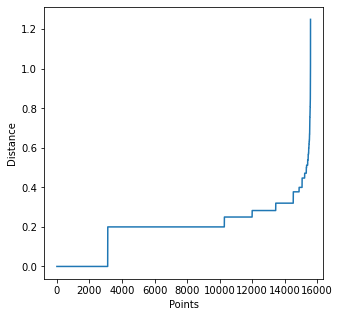

In [194]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(db_cs)

distances, indices = neighbors.kneighbors(db_cs)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [195]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=5)
dbscan_cluster.fit(db_cs)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 4
Estimated no. of noise points: 56


In [196]:
db_cs_dbscan['label'] = dbscan_cluster.labels_

db_cs_dbscan.groupby(['label']).describe().transpose()
#db_cs_dbscan.groupby(['label']).mean().transpose()

label             -1        0        1      2     3
Churn   count  56.00  7093.00  8415.00  17.00  5.00
        mean    0.32     1.00     0.00   0.00  0.00
        std     0.47     0.00     0.00   0.00  0.00
        min     0.00     1.00     0.00   0.00  0.00
        25%     0.00     1.00     0.00   0.00  0.00
        50%     0.00     1.00     0.00   0.00  0.00
        75%     1.00     1.00     0.00   0.00  0.00
        max     1.00     1.00     0.00   0.00  0.00
Rating1 count  56.00  7093.00  8415.00  17.00  5.00
        mean    2.79     2.81     3.07   2.19  1.95
        std     1.38     0.84     1.26   0.35  0.21
        min     1.00     1.00     1.00   1.50  1.75
        25%     1.44     2.25     2.00   2.00  1.75
        50%     2.75     2.75     3.00   2.25  2.00
        75%     3.81     3.50     4.00   2.50  2.00
        max     5.00     4.75     5.00   2.75  2.25
Rating2 count  56.00  7093.00  8415.00  17.00  5.00
        mean    2.23     2.83     3.88   1.02  1.04
        std     1.33     0.98     0.76   0.07  0.09
        min     1.00     1.00     1.20   1.00  1.00
        25%     1.00     2.00     3.60   1.00  1.00
        50%     1.80     2.80     4.00   1.00  1.00
        75%     2.80     3.60     4.40   1.00  1.00
        max     5.00     5.00     5.00   1.20  1.20
Rating3 count  56.00  7093.00  8415.00  17.00  5.00
        mean    2.41     3.15     3.86   3.87  2.84
        std     1.25     0.80     0.78   0.26  0.17
        min     1.00     1.00     1.00   3.40  2.60
        25%     1.40     2.60     3.40   3.60  2.80
        50%     2.00     3.20     4.00   3.80  2.80
        75%     3.20     3.80     4.40   4.00  3.00
        max     5.00     5.00     5.00   4.40  3.00

The segmentation of customers was, however, different from the one provided by the KMeans algorithm. DBSCAN provided more segmentation among the customers who not churn.

From a business point of view, perhaps it is necessary to pay more attention to customers who churn than to customers who do not churn, so the clustering results provided by KMeans are more meaningful in that sense.

This way, we decided to keep the results from **KMeans for k = 4**, given the insightful segmentation of customers from which an efficient marketing plan can be derived. 

# Cluster Merge

The final step before drafting the marketing plan is to concatenate the clustering results from the "Customer Characteristics" and "Quality of Service" perspectives. There is no need of concatening the results from the "Customer Satisfaction" perspective since the "Quality of Service" one already reflects its results.

##### Join Customer Characteristics with Quality of Service

In [197]:
# Characteristocs: db_customer_characteristics_k3
# Satisfaction: db_cs_k4
final_clusters = pd.merge(db_customer_characteristics_k3.rename(columns = {'label':'label_cc'}), db_cs_k4.rename(columns = {'label':'label_cs'}), left_index=True, right_index=True)
final_clusters.head()

,Gender,Age,TypeTravel,RoomType_double,RoomType_single,RoomType_suite,Longevity,RewardPoints_Bins,label_cc,Churn,Rating1,Rating2,Rating3,label_cs
0,0,48.0,1,0,1,0,1,2,0,1,3.00,3.6,3.2,3
1,1,57.0,1,0,1,0,1,3,0,0,1.00,3.8,4.2,1
2,1,49.0,1,0,1,0,1,2,0,1,3.00,2.6,2.6,3
3,0,29.0,0,1,0,0,1,2,2,0,1.00,4.0,4.0,1
4,1,33.0,1,0,1,0,1,3,0,0,2.25,5.0,3.2,1


In [198]:
final_clusters.value_counts(["label_cc", "label_cs"])

label_cc  label_cs
0         1           2831
          2           2498
          3           1467
2         2           1377
          0           1227
0         0           1149
1         3           1093
2         1           1065
1         0           1032
2         3            840
1         2            580
          1            427
dtype: int64